### Business Problem Overview In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### In this casestudy we will consider the prepaid customers to predict the customer churn.

In [3]:
#import all the required libraries
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for handling the missing values
from fancyimpute import IterativeImputer

#to build the model
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
#import model selection techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#to evaluate model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, accuracy_score

#to build the model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#To scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#to select the feautures
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.float_format', lambda x: '%.6f' %x)

In [4]:
#importing data

df=pd.read_csv('telecom_churn_data.csv')


In [5]:
#checking if the import is correctly done
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385000,214.816000,213.803000,21.100000,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,nan,nan,0.160000,nan,nan,nan,4.130000,nan,nan,nan,1.150000,nan,nan,nan,5.440000,nan,nan,nan,0.000000,nan,nan,n

In [6]:
# basic check of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
#check sum of missing values
df.isnull().sum().sort_values(ascending = False)

count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
total_rech_data_6           74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
arpu_3g_7                   74428
count_rech_2g_7             74428
fb_user_7                   74428
count_rech_3g_7             74428
arpu_2g_7                   74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
night_pck_user_7            74428
total_rech_data_7           74428
date_of_last_rech_data_7    74428
night_pck_user_9            74077
date_of_last_rech_data_9    74077
fb_user_9                   74077
arpu_2g_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
total_rech_data_9           74077
av_rech_amt_data_9          74077
count_rech_3g_9             74077
count_rech_2g_

In [8]:
#check % of missing values
df_missing_values = 100*(df.isnull().sum()/df.shape[0]).sort_values(ascending= False)
df_missing_values

count_rech_2g_6            74.846748
date_of_last_rech_data_6   74.846748
count_rech_3g_6            74.846748
av_rech_amt_data_6         74.846748
max_rech_data_6            74.846748
total_rech_data_6          74.846748
arpu_3g_6                  74.846748
arpu_2g_6                  74.846748
night_pck_user_6           74.846748
fb_user_6                  74.846748
arpu_3g_7                  74.428744
count_rech_2g_7            74.428744
fb_user_7                  74.428744
count_rech_3g_7            74.428744
arpu_2g_7                  74.428744
av_rech_amt_data_7         74.428744
max_rech_data_7            74.428744
night_pck_user_7           74.428744
total_rech_data_7          74.428744
date_of_last_rech_data_7   74.428744
night_pck_user_9           74.077741
date_of_last_rech_data_9   74.077741
fb_user_9                  74.077741
arpu_2g_9                  74.077741
max_rech_data_9            74.077741
arpu_3g_9                  74.077741
total_rech_data_9          74.077741
a

In [9]:
# check the categories in circle id
df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

In [10]:
# check the categories in last date of month for all months
print('month 6: ',df.last_date_of_month_6.value_counts())
print('month 7: ',df.last_date_of_month_7.value_counts())
print('month 8: ',df.last_date_of_month_8.value_counts())
print('month 9: ',df.last_date_of_month_9.value_counts())

month 6:  6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
month 7:  7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
month 8:  8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
month 9:  9/30/2014    98340
Name: last_date_of_month_9, dtype: int64


In [11]:
#checking the null values in last date of the month for all months
df[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']].isnull().sum()

last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
dtype: int64

**  Thus it is observed that in last date of month column, most of the rows are having a single value and others are null. So, we can remove circle_id, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 columns as there is 0 variance in these columns**

In [12]:
df = df.drop(['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis = 1)

In [13]:
#select recharge columns
rch_cols=[i for i in df.columns if 'rch' in i]

In [14]:
rch_cols

['last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9']

In [15]:
df.rename(columns={"last_day_rch_amt_6":"last_day_rech_amt_6","last_day_rch_amt_7":"last_day_rech_amt_7","last_day_rch_amt_8":"last_day_rech_amt_8","last_day_rch_amt_9":"last_day_rech_amt_9"},inplace=True)

In [16]:
#select recharge column
recharg_cols=[i  for i in df.columns if 'rech' in i.lower()]


In [17]:
#segregate the list of columns by month 
month_6_cols=[i  for i in df.columns if '_6' in i]
month_7_cols=[i  for i in df.columns if '_7' in i]
month_8_cols=[i  for i in df.columns if '_8' in i]
month_9_cols=[i  for i in df.columns if '_9' in i]

### Analyzing the recharge for **Month 6**

In [18]:
#month 6 recharge columns
rech_6_cols = [i for i in month_6_cols if(('rech' in i)) ]


In [19]:
df[rech_6_cols].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rech_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,4,362,252,6/21/2014,252,6/21/2014,1.000000,252.000000,0.000000,1.000000,252.000000
1,4,74,44,6/29/2014,44,NaN,nan,nan,nan,nan,nan
2,5,168,86,6/17/2014,0,NaN,nan,nan,nan,nan,nan
3,10,230,60,6/28/2014,30,NaN,nan,nan,nan,nan,nan
4,5,196,56,6/26/2014,50,6/4/2014,1.000000,56.000000,1.000000,0.000000,56.000000


In [20]:
#check if either of the recharge amount or total data recharge is null
df[(df['total_rech_amt_6']==0) | (df['total_rech_data_6'] == 0)] [rech_6_cols].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rech_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
10,1,0,0,6/14/2014,0,NaN,nan,nan,nan,nan,nan
15,1,0,0,6/14/2014,0,NaN,nan,nan,nan,nan,nan
18,1,0,0,6/17/2014,0,NaN,nan,nan,nan,nan,nan
23,3,0,0,6/18/2014,0,NaN,nan,nan,nan,nan,nan
26,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan


In [21]:
#check if both recharge amount and total data recharge is null
df[(df['total_rech_amt_6']==0) & (df['total_rech_data_6'] == 0)] [rech_6_cols].shape[0]

0

In [22]:
#check if maximum recharge amount is null
df[df['max_rech_amt_6'].isnull()][rech_6_cols].shape[0]

0

In [23]:
#check if total number of recharge is null
df[df['total_rech_num_6'].isnull()][rech_6_cols].shape[0]

0

In [24]:
#check for how many rows date of last recharge is null
df[df['date_of_last_rech_6'].isnull()][rech_6_cols].shape[0]

1607

In [25]:
#check the size of the rows where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
df[(df['date_of_last_rech_6'].isnull()) & (df['total_rech_num_6'] == 0) & (df['total_rech_amt_6'] == 0) & (df['max_rech_amt_6'] == 0)][rech_6_cols].shape[0]

1607

For all the rows where date_of_last_rech_6 is missing the value of column total_rech_num_6, total_rech_amt_6, max_rech_amt_6 is 0

#### Creating the derived column: total recharge amount for data

In [26]:
df['total_rech_amt_data_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']

In [27]:
rech_6_cols.append(('total_rech_amt_data_6'))

In [28]:
#check the size of the rows where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
df[((df.total_rech_data_6.isnull()) & (df. av_rech_amt_data_6.notnull()) | (df.total_rech_data_6.notnull()) & (df. av_rech_amt_data_6.isnull()))].shape[0]

0

In [29]:
#impute the rows with zero total recharge amount is null
df.loc[df.total_rech_amt_data_6.isnull(), 'total_rech_amt_data_6'] = df.loc[df.total_rech_amt_data_6.isnull(), 'total_rech_amt_data_6'].fillna(0)

#### Creating the derived field: total recharge for month 6 which will be equal to normal recharge + data recharge

In [30]:
df['total_rech_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']

In [31]:
df['total_rech_6'].isnull().sum()

0

In [32]:
rech_6_cols.append('total_rech_6')

In [33]:
df[rech_6_cols].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rech_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,total_rech_amt_data_6,total_rech_6
0,4,362,252,6/21/2014,252,6/21/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000,614.000000
1,4,74,44,6/29/2014,44,NaN,nan,nan,nan,nan,nan,0.000000,74.000000
2,5,168,86,6/17/2014,0,NaN,nan,nan,nan,nan,nan,0.000000,168.000000
3,10,230,60,6/28/2014,30,NaN,nan,nan,nan,nan,nan,0.000000,230.000000
4,5,196,56,6/26/2014,50,6/4/2014,1.000000,56.000000,1.000000,0.000000,56.000000,56.000000,252.000000


In [34]:
#check size of rows where total recharge is not null but data recharges are null
df[(df.total_rech_6.notnull()) & ( (df.total_rech_data_6.isnull()) |
                                 (df.max_rech_data_6.isnull()) | (df.count_rech_2g_6.isnull()) |
                                 (df.count_rech_3g_6.isnull()) | (df.av_rech_amt_data_6.isnull())
                                 | (df.total_rech_amt_data_6.isnull()))] [rech_6_cols].shape[0]

74846

In [35]:
#impute the rows with zero where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
rule=((df.total_rech_6.notnull()) & ( (df.total_rech_data_6.isnull()) |
                                 (df.max_rech_data_6.isnull()) | (df.count_rech_2g_6.isnull()) |
                                 (df.count_rech_3g_6.isnull()) | (df.av_rech_amt_data_6.isnull())
                                 | (df.total_rech_amt_data_6.isnull())))
mis_amt_col = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'total_rech_amt_data_6']
df.loc[rule, mis_amt_col] = df.loc[rule, mis_amt_col].fillna(0)

In [36]:
#check the size of the rows after imputation
df[(df.total_rech_6.notnull()) & ( (df.total_rech_data_6.isnull()) |
                                 (df.max_rech_data_6.isnull()) | (df.count_rech_2g_6.isnull()) |
                                 (df.count_rech_3g_6.isnull()) | (df.av_rech_amt_data_6.isnull())
                                 | (df.total_rech_amt_data_6.isnull()))] [rech_6_cols].shape[0]

0

In [37]:
df[rech_6_cols].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rech_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,total_rech_amt_data_6,total_rech_6
0,4,362,252,6/21/2014,252,6/21/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000,614.000000
1,4,74,44,6/29/2014,44,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
2,5,168,86,6/17/2014,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000
3,10,230,60,6/28/2014,30,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000
4,5,196,56,6/26/2014,50,6/4/2014,1.000000,56.000000,1.000000,0.000000,56.000000,56.000000,252.000000


In [38]:
#check the % of missing values
100*(df[rech_6_cols].isnull().sum()/df[rech_6_cols].shape[0]).sort_values(ascending= False)

date_of_last_rech_data_6   74.846748
date_of_last_rech_6         1.607016
total_rech_6                0.000000
total_rech_amt_data_6       0.000000
av_rech_amt_data_6          0.000000
count_rech_3g_6             0.000000
count_rech_2g_6             0.000000
max_rech_data_6             0.000000
total_rech_data_6           0.000000
last_day_rech_amt_6         0.000000
max_rech_amt_6              0.000000
total_rech_amt_6            0.000000
total_rech_num_6            0.000000
dtype: float64

We will not impute the date columns as we have already imputed the values based on last recharge date and we are not gonna use it further

### Analyzing the recharge for **Month 7**

In [39]:
#month 7 recharge columns
rech_7_cols = [i for i in month_7_cols if(('rech' in i)) ]

In [40]:
df[rech_7_cols].head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rech_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7
0,3,252,252,7/16/2014,252,7/16/2014,1.000000,252.000000,0.000000,1.000000,252.000000
1,9,384,154,7/31/2014,23,7/25/2014,1.000000,154.000000,1.000000,0.000000,154.000000
2,4,315,200,7/24/2014,200,NaN,nan,nan,nan,nan,nan
3,11,310,50,7/31/2014,50,NaN,nan,nan,nan,nan,nan
4,6,350,110,7/28/2014,110,NaN,nan,nan,nan,nan,nan


In [41]:
#check if either of the total recharge number, total recharge amount, maximum recharge amount or date of last recharge is null
df[(df.total_rech_num_7.isnull()) | (df.total_rech_amt_7.isnull()) | (df.max_rech_amt_7.isnull()) | (df.date_of_last_rech_7.isnull()) ][rech_7_cols].shape[0]

1767

In [42]:
df[(df.total_rech_num_7 == np.nan) | (df.total_rech_amt_7 == np.nan) | (df.max_rech_amt_7 == np.nan) | (df.date_of_last_rech_7 == np.nan) ][rech_7_cols].shape[0]

0

In [43]:
#check if total data recharge is null
df[(df['total_rech_data_7'].isnull())] [rech_7_cols].head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rech_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7
2,4,315,200,7/24/2014,200,NaN,nan,nan,nan,nan,nan
3,11,310,50,7/31/2014,50,NaN,nan,nan,nan,nan,nan
4,6,350,110,7/28/2014,110,NaN,nan,nan,nan,nan,nan
5,2,0,0,7/17/2014,0,NaN,nan,nan,nan,nan,nan
6,10,222,37,7/31/2014,24,NaN,nan,nan,nan,nan,nan


In [44]:
#check for how many rows date of last recharge is null
df[df['date_of_last_rech_7'].isnull()][rech_7_cols].shape[0]

1767

In [45]:
#check the size of the rows where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
df[(df['date_of_last_rech_7'].isnull()) & (df['total_rech_num_7'] == 0) & (df['total_rech_amt_7'] == 0) & (df['max_rech_amt_7'] == 0)][rech_7_cols].shape[0]

1767

For all the rows where date_of_last_rech_7 is missing the value of column total_rech_num_7, total_rech_amt_7, max_rech_amt_7 is 0

#### Creating the derived column total recharge amount data for month 7

In [46]:
df['total_rech_amt_data_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

In [47]:
rech_7_cols.append(('total_rech_amt_data_7'))

In [48]:
df[rech_7_cols].head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rech_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,total_rech_amt_data_7
0,3,252,252,7/16/2014,252,7/16/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000
1,9,384,154,7/31/2014,23,7/25/2014,1.000000,154.000000,1.000000,0.000000,154.000000,154.000000
2,4,315,200,7/24/2014,200,NaN,nan,nan,nan,nan,nan,nan
3,11,310,50,7/31/2014,50,NaN,nan,nan,nan,nan,nan,nan
4,6,350,110,7/28/2014,110,NaN,nan,nan,nan,nan,nan,nan


In [49]:
df[((df.total_rech_amt_data_7.isnull()) & ((df.total_rech_data_7.notnull()) | (df. av_rech_amt_data_7.notnull())))][rech_7_cols].shape[0]

0

In [50]:
#impute the rows with zero total recharge amount is null
df.loc[df.total_rech_amt_data_7.isnull(), 'total_rech_amt_data_7'] = df.loc[df.total_rech_amt_data_7.isnull(), 'total_rech_amt_data_7'].fillna(0)

#### Creating the derived field: total recharge for month 7 which will be equal to normal recharge + data recharge

In [51]:
df['total_rech_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

In [52]:
df[df['total_rech_7'].isnull()][rech_7_cols].shape[0]

0

In [53]:
rech_7_cols.append('total_rech_7')

In [54]:
df[rech_7_cols].head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rech_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,total_rech_amt_data_7,total_rech_7
0,3,252,252,7/16/2014,252,7/16/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000,504.000000
1,9,384,154,7/31/2014,23,7/25/2014,1.000000,154.000000,1.000000,0.000000,154.000000,154.000000,538.000000
2,4,315,200,7/24/2014,200,NaN,nan,nan,nan,nan,nan,0.000000,315.000000
3,11,310,50,7/31/2014,50,NaN,nan,nan,nan,nan,nan,0.000000,310.000000
4,6,350,110,7/28/2014,110,NaN,nan,nan,nan,nan,nan,0.000000,350.000000


In [55]:
#check size of rows where total recharge is not null but data recharges are null
df[(df.total_rech_7.notnull()) & ( (df.total_rech_data_7.isnull()) |
                                 (df.max_rech_data_7.isnull()) | (df.count_rech_2g_7.isnull()) |
                                 (df.count_rech_3g_7.isnull()) | (df.av_rech_amt_data_7.isnull())
                                 | (df.total_rech_amt_data_7.isnull()))] [rech_7_cols].shape[0]

74428

In [56]:
#impute the rows with zero where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
rule=((df.total_rech_7.notnull()) & ( (df.total_rech_data_7.isnull()) |
                                 (df.max_rech_data_7.isnull()) | (df.count_rech_2g_7.isnull()) |
                                 (df.count_rech_3g_7.isnull()) | (df.av_rech_amt_data_7.isnull())
                                 | (df.total_rech_amt_data_7.isnull())))
mis_amt_col = ['total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'total_rech_amt_data_7']
df.loc[rule, mis_amt_col] = df.loc[rule, mis_amt_col].fillna(0)

In [57]:
#check the size of the rows after imputation
df[(df.total_rech_7.notnull()) & ( (df.total_rech_data_7.isnull()) |
                                 (df.max_rech_data_7.isnull()) | (df.count_rech_2g_7.isnull()) |
                                 (df.count_rech_3g_7.isnull()) | (df.av_rech_amt_data_7.isnull())
                                 | (df.total_rech_amt_data_7.isnull()))] [rech_7_cols].shape[0]

0

In [58]:
df[rech_7_cols].head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rech_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,total_rech_amt_data_7,total_rech_7
0,3,252,252,7/16/2014,252,7/16/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000,504.000000
1,9,384,154,7/31/2014,23,7/25/2014,1.000000,154.000000,1.000000,0.000000,154.000000,154.000000,538.000000
2,4,315,200,7/24/2014,200,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,315.000000
3,11,310,50,7/31/2014,50,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000
4,6,350,110,7/28/2014,110,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000


In [59]:
#check the % of missing values
100*(df[rech_7_cols].isnull().sum()/df[rech_7_cols].shape[0]).sort_values(ascending= False)

date_of_last_rech_data_7   74.428744
date_of_last_rech_7         1.767018
total_rech_7                0.000000
total_rech_amt_data_7       0.000000
av_rech_amt_data_7          0.000000
count_rech_3g_7             0.000000
count_rech_2g_7             0.000000
max_rech_data_7             0.000000
total_rech_data_7           0.000000
last_day_rech_amt_7         0.000000
max_rech_amt_7              0.000000
total_rech_amt_7            0.000000
total_rech_num_7            0.000000
dtype: float64

#### Creating the derived field: total recharge for month 6 & 7 which will be equal to total recharge for month 6 + total recharge for month 7

In [60]:
df['total_rech_6_7'] = (df['total_rech_6'] + df['total_rech_7'])/2

In [61]:
#check the distribution of total recharge amount for month 6th and 7th
df['total_rech_6_7'].describe(percentiles=[0.25, .5, .7, .75, .9])

count   99999.000000
mean      485.328068
std       869.423594
min         0.000000
25%       128.000000
50%       275.000000
70%       478.000000
75%       553.000000
90%      1028.000000
max     61236.000000
Name: total_rech_6_7, dtype: float64

In [62]:
#check the number of customers above 70th percentile
df[df['total_rech_6_7'] >= df['total_rech_6_7'].quantile(0.7)]['total_rech_6_7'].count()

30001

### High value customer filtering

In [63]:
#create another df for high value customer
hvc_cust = df[df['total_rech_6_7'] >= df['total_rech_6_7'].quantile(0.7)]

In [64]:
hvc_cust.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_6,total_rech_amt_data_7,total_rech_7,total_rech_6_7
0,7000842753,0.000000,0.000000,0.000000,197.385000,214.816000,213.803000,21.100000,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,nan,nan,0.160000,nan,nan,nan,4.130000,nan,nan,nan,1.150000,nan,nan,nan,5.440000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.00

### Observing the distribution of total minutes if usage over months

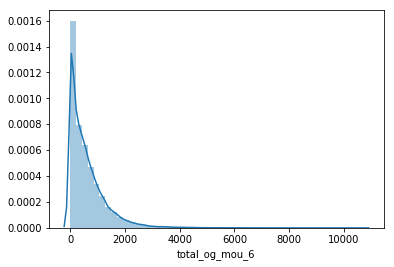

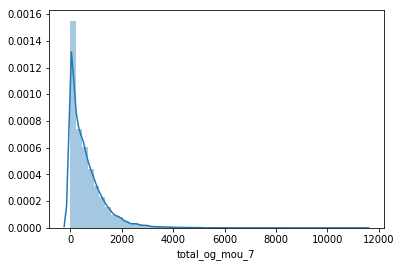

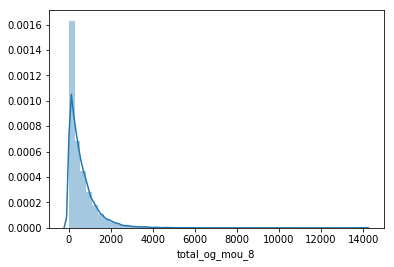

In [65]:
sns.distplot(hvc_cust['total_og_mou_6'])
plt.show()
sns.distplot(hvc_cust['total_og_mou_7'])
plt.show()
sns.distplot(hvc_cust['total_og_mou_8'])
plt.show()

### As observed , the data is highly right skewed

### Observing the distribution of total recharge if usage over months

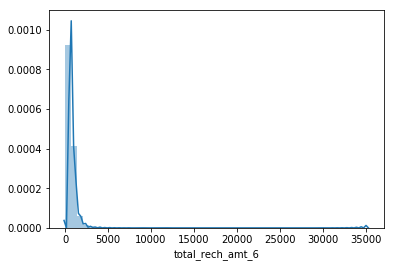

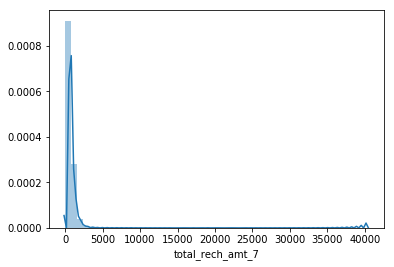

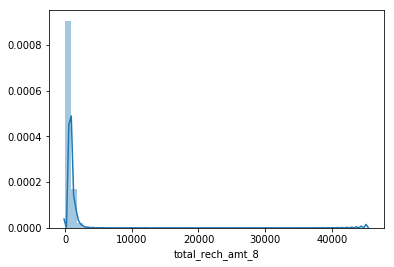

In [66]:
sns.distplot(hvc_cust['total_rech_amt_6'])
plt.show()
sns.distplot(hvc_cust['total_rech_amt_7'])
plt.show()
sns.distplot(hvc_cust['total_rech_amt_8'])
plt.show()

### As observed , the data is highly right skewed

In [67]:
#check the % of missing values
100*(hvc_cust.isnull().sum()/hvc_cust.shape[0]).sort_values(ascending= False)

arpu_2g_9                  49.268358
date_of_last_rech_data_9   49.268358
total_rech_data_9          49.268358
max_rech_data_9            49.268358
arpu_3g_9                  49.268358
count_rech_2g_9            49.268358
night_pck_user_9           49.268358
count_rech_3g_9            49.268358
fb_user_9                  49.268358
av_rech_amt_data_9         49.268358
arpu_3g_8                  46.825106
arpu_2g_8                  46.825106
count_rech_3g_8            46.825106
count_rech_2g_8            46.825106
max_rech_data_8            46.825106
total_rech_data_8          46.825106
night_pck_user_8           46.825106
av_rech_amt_data_8         46.825106
date_of_last_rech_data_8   46.825106
fb_user_8                  46.825106
night_pck_user_6           44.148528
arpu_3g_6                  44.148528
date_of_last_rech_data_6   44.148528
fb_user_6                  44.148528
arpu_2g_6                  44.148528
date_of_last_rech_data_7   43.145228
arpu_3g_7                  43.145228
f

#### Analyzing the data for **Month 8**

In [68]:
#month 8 recharge columns
rech_8_cols = [i for i in month_8_cols if(('rech' in i)) ]

In [69]:
hvc_cust[rech_8_cols].head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8
0,2,252,252,8/8/2014,252,8/8/2014,1.000000,252.000000,0.000000,1.000000,252.000000
7,7,3638,1580,8/26/2014,779,NaN,nan,nan,nan,nan,nan
8,14,120,30,8/30/2014,10,8/23/2014,3.000000,23.000000,3.000000,0.000000,69.000000
21,27,718,50,8/31/2014,50,NaN,nan,nan,nan,nan,nan
23,4,439,179,8/24/2014,0,8/6/2014,2.000000,179.000000,0.000000,2.000000,270.000000


In [70]:
#check the size of the rows where either of date of last recharge, total number of recharge, total recharge amount or maximum recharge is null
hvc_cust[(hvc_cust.total_rech_num_8.isnull()) | (hvc_cust.total_rech_amt_8.isnull()) | (hvc_cust.max_rech_amt_8.isnull()) | (hvc_cust.date_of_last_rech_8.isnull()) ][rech_8_cols].head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8
188,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan
191,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan
588,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan
603,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan
687,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan


In [71]:
hvc_cust[(hvc_cust.total_rech_num_8 == np.nan) | (hvc_cust.total_rech_amt_8 == np.nan) | (hvc_cust.max_rech_amt_8 == np.nan) | (hvc_cust.date_of_last_rech_8 == np.nan) ][rech_8_cols].shape[0]

0

In [72]:
hvc_cust[(hvc_cust['total_rech_data_8'].isnull())] [rech_8_cols].shape[0]

14048

In [73]:
#check the size of the rows where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
df[(df['date_of_last_rech_8'].isnull()) & (df['total_rech_num_8'] == 0) & (df['total_rech_amt_8'] == 0) & (df['max_rech_amt_8'] == 0)][rech_8_cols].shape[0]

3622

#### For all the rows where date_of_last_rech_8 is missing the value of column total_rech_num_8, total_rech_amt_8, max_rech_amt_8 is 0

In [74]:
hvc_cust[hvc_cust['date_of_last_rech_data_8'].isnull()][rech_8_cols].head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8
7,7,3638,1580,8/26/2014,779,NaN,nan,nan,nan,nan,nan
21,27,718,50,8/31/2014,50,NaN,nan,nan,nan,nan,nan
38,6,416,130,8/24/2014,130,NaN,nan,nan,nan,nan,nan
41,3,410,150,8/31/2014,110,NaN,nan,nan,nan,nan,nan
48,3,197,130,8/28/2014,130,NaN,nan,nan,nan,nan,nan


#### Creating the derived column total recharge amount data for month 8

In [75]:
hvc_cust['total_rech_amt_data_8'] = hvc_cust['total_rech_data_8'] * hvc_cust['av_rech_amt_data_8']

In [76]:
hvc_cust[rech_8_cols].head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8
0,2,252,252,8/8/2014,252,8/8/2014,1.000000,252.000000,0.000000,1.000000,252.000000
7,7,3638,1580,8/26/2014,779,NaN,nan,nan,nan,nan,nan
8,14,120,30,8/30/2014,10,8/23/2014,3.000000,23.000000,3.000000,0.000000,69.000000
21,27,718,50,8/31/2014,50,NaN,nan,nan,nan,nan,nan
23,4,439,179,8/24/2014,0,8/6/2014,2.000000,179.000000,0.000000,2.000000,270.000000


In [77]:
#check the size of the rows where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
df[(df['date_of_last_rech_8'].isnull()) & (df['total_rech_num_8'] == 0) | (df['total_rech_amt_8'] == 0) | (df['max_rech_amt_8'] == 0)][rech_8_cols].shape[0]

13632

In [78]:
rech_8_cols.append(('total_rech_amt_data_8'))

In [79]:
#impute the rows with zero total recharge amount is null
hvc_cust.loc[hvc_cust.total_rech_amt_data_8.isnull(), 'total_rech_amt_data_8'] = hvc_cust.loc[hvc_cust.total_rech_amt_data_8.isnull(), 'total_rech_amt_data_8'].fillna(0)

#### Creating the derived field: total recharge for month 8 which will be equal to normal recharge + data recharge

In [80]:
hvc_cust['total_rech_8'] = hvc_cust['total_rech_amt_data_8'] + hvc_cust['total_rech_amt_8']

In [81]:
hvc_cust[hvc_cust['total_rech_8'].isnull()][rech_8_cols].shape[0]

0

In [82]:
rech_8_cols.append('total_rech_8')

In [83]:
hvc_cust[rech_8_cols].head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_rech_amt_data_8,total_rech_8
0,2,252,252,8/8/2014,252,8/8/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000,504.000000
7,7,3638,1580,8/26/2014,779,NaN,nan,nan,nan,nan,nan,0.000000,3638.000000
8,14,120,30,8/30/2014,10,8/23/2014,3.000000,23.000000,3.000000,0.000000,69.000000,207.000000,327.000000
21,27,718,50,8/31/2014,50,NaN,nan,nan,nan,nan,nan,0.000000,718.000000
23,4,439,179,8/24/2014,0,8/6/2014,2.000000,179.000000,0.000000,2.000000,270.000000,540.000000,979.000000


In [84]:
#check size of rows where total recharge is not null but data recharges are null
hvc_cust[(hvc_cust.total_rech_8.notnull()) & ( (hvc_cust.total_rech_data_8.isnull()) |
                                 (hvc_cust.max_rech_data_8.isnull()) | (hvc_cust.count_rech_2g_8.isnull()) |
                                 (hvc_cust.count_rech_3g_8.isnull()) | (hvc_cust.av_rech_amt_data_8.isnull())
                                 | (hvc_cust.total_rech_amt_data_8.isnull()))] [rech_8_cols].shape[0]

14048

In [85]:
#impute the rows with zero where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
rule=((hvc_cust.total_rech_8.notnull()) & ( (hvc_cust.total_rech_data_8.isnull()) |
                                 (hvc_cust.max_rech_data_8.isnull()) | (hvc_cust.count_rech_2g_8.isnull()) |
                                 (hvc_cust.count_rech_3g_8.isnull()) | (hvc_cust.av_rech_amt_data_8.isnull())
                                 | (hvc_cust.total_rech_amt_data_8.isnull())))
mis_amt_col = ['total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'total_rech_amt_data_8']
hvc_cust.loc[rule, mis_amt_col] = hvc_cust.loc[rule, mis_amt_col].fillna(0)

In [86]:
#check the size of the rows after imputation
hvc_cust[(hvc_cust.total_rech_8.notnull()) & ( (hvc_cust.total_rech_data_8.isnull()) |
                                 (hvc_cust.max_rech_data_8.isnull()) | (hvc_cust.count_rech_2g_8.isnull()) |
                                 (hvc_cust.count_rech_3g_8.isnull()) | (hvc_cust.av_rech_amt_data_8.isnull())
                                 | (hvc_cust.total_rech_amt_data_8.isnull()))] [rech_8_cols].shape[0]

0

In [87]:
#check the % of missing values
100*(hvc_cust[rech_8_cols].isnull().sum()/hvc_cust[rech_8_cols].shape[0]).sort_values(ascending= False)

date_of_last_rech_data_8   46.825106
date_of_last_rech_8         1.943269
total_rech_8                0.000000
total_rech_amt_data_8       0.000000
av_rech_amt_data_8          0.000000
count_rech_3g_8             0.000000
count_rech_2g_8             0.000000
max_rech_data_8             0.000000
total_rech_data_8           0.000000
last_day_rech_amt_8         0.000000
max_rech_amt_8              0.000000
total_rech_amt_8            0.000000
total_rech_num_8            0.000000
dtype: float64

#### Analyzing the data for **Month 9**

In [88]:
#month 9 recharge columns
rech_9_cols = [i for i in month_9_cols if(('rech' in i)) ]

In [89]:
hvc_cust[rech_9_cols].head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rech_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9
0,6,0,0,9/28/2014,0,NaN,nan,nan,nan,nan,nan
7,3,0,0,9/30/2014,0,NaN,nan,nan,nan,nan,nan
8,15,186,36,9/30/2014,0,NaN,nan,nan,nan,nan,nan
21,17,680,50,9/30/2014,30,NaN,nan,nan,nan,nan,nan
23,4,252,252,9/28/2014,0,9/9/2014,1.000000,252.000000,0.000000,1.000000,252.000000


In [90]:
#check if either of the total recharge amount, total recharge amount, maximum recharg amount or date of last recharge amount is zero
hvc_cust[(df.total_rech_num_9.isnull()) | (hvc_cust.total_rech_amt_9.isnull()) | (hvc_cust.max_rech_amt_9.isnull()) | (hvc_cust.date_of_last_rech_9.isnull()) ][rech_9_cols].head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rech_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9
67,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan
188,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan
256,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan
485,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan
588,0,0,0,NaN,0,NaN,nan,nan,nan,nan,nan


In [91]:
hvc_cust[(hvc_cust.total_rech_num_9 == np.nan) | (hvc_cust.total_rech_amt_9 == np.nan) | (hvc_cust.max_rech_amt_9 == np.nan) | (hvc_cust.date_of_last_rech_9 == np.nan) ][rech_9_cols].shape[0]

0

In [92]:
#check if total number of recharge is null
hvc_cust[(hvc_cust['total_rech_data_9'].isnull())] [rech_9_cols].shape[0]

14781

In [93]:
#check for how many rows date of last recharge is null
hvc_cust[hvc_cust['date_of_last_rech_9'].isnull()][rech_9_cols].shape[0]

815

In [94]:
#check the size of the rows where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
df[(df['date_of_last_rech_9'].isnull()) & (df['total_rech_num_9'] == 0) | (df['total_rech_amt_9'] == 0) | (df['max_rech_amt_9'] == 0)][rech_9_cols].shape[0]

17956

For all the rows where date_of_last_rech_9 is missing the value of column total_rech_num_9, total_rech_amt_9, max_rech_amt_9 is 0

In [95]:
hvc_cust[hvc_cust['date_of_last_rech_data_9'].isnull()][rech_9_cols].head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rech_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9
0,6,0,0,9/28/2014,0,NaN,nan,nan,nan,nan,nan
7,3,0,0,9/30/2014,0,NaN,nan,nan,nan,nan,nan
8,15,186,36,9/30/2014,0,NaN,nan,nan,nan,nan,nan
21,17,680,50,9/30/2014,30,NaN,nan,nan,nan,nan,nan
41,1,130,130,9/17/2014,130,NaN,nan,nan,nan,nan,nan


In [96]:
hvc_cust[rech_9_cols].head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rech_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9
0,6,0,0,9/28/2014,0,NaN,nan,nan,nan,nan,nan
7,3,0,0,9/30/2014,0,NaN,nan,nan,nan,nan,nan
8,15,186,36,9/30/2014,0,NaN,nan,nan,nan,nan,nan
21,17,680,50,9/30/2014,30,NaN,nan,nan,nan,nan,nan
23,4,252,252,9/28/2014,0,9/9/2014,1.000000,252.000000,0.000000,1.000000,252.000000


#### Creating the derived column total recharge amount data for month 9

In [97]:
hvc_cust['total_rech_amt_data_9'] = hvc_cust['total_rech_data_9'] * hvc_cust['av_rech_amt_data_9']

In [98]:
rech_9_cols.append(('total_rech_amt_data_9'))

In [99]:
hvc_cust[rech_9_cols].head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rech_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,total_rech_amt_data_9
0,6,0,0,9/28/2014,0,NaN,nan,nan,nan,nan,nan,nan
7,3,0,0,9/30/2014,0,NaN,nan,nan,nan,nan,nan,nan
8,15,186,36,9/30/2014,0,NaN,nan,nan,nan,nan,nan,nan
21,17,680,50,9/30/2014,30,NaN,nan,nan,nan,nan,nan,nan
23,4,252,252,9/28/2014,0,9/9/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000


In [100]:
#check the size of the rows where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
df[((df.total_rech_data_9.isnull()) & (df. av_rech_amt_data_9.notnull()) | (df.total_rech_data_9.notnull()) & (df. av_rech_amt_data_9.isnull()))].shape[0]

0

In [101]:
#impute the rows with zero total recharge amount is null
hvc_cust.loc[hvc_cust.total_rech_amt_data_9.isnull(), 'total_rech_amt_data_9'] = hvc_cust.loc[hvc_cust.total_rech_amt_data_9.isnull(), 'total_rech_amt_data_9'].fillna(0)

In [102]:
#check after imputation
df[((df.total_rech_data_9.isnull()) & (df. av_rech_amt_data_9.notnull()) | (df.total_rech_data_9.notnull()) & (df. av_rech_amt_data_9.isnull()))].shape[0]

0

In [103]:
hvc_cust[rech_9_cols].head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rech_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,total_rech_amt_data_9
0,6,0,0,9/28/2014,0,NaN,nan,nan,nan,nan,nan,0.000000
7,3,0,0,9/30/2014,0,NaN,nan,nan,nan,nan,nan,0.000000
8,15,186,36,9/30/2014,0,NaN,nan,nan,nan,nan,nan,0.000000
21,17,680,50,9/30/2014,30,NaN,nan,nan,nan,nan,nan,0.000000
23,4,252,252,9/28/2014,0,9/9/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000


#### Creating the derived field: total recharge for month 9 which will be equal to normal recharge + data recharge

In [104]:
hvc_cust['total_rech_9'] = hvc_cust['total_rech_amt_data_9'] + hvc_cust['total_rech_amt_9']

In [105]:
hvc_cust[hvc_cust['total_rech_9'].isnull()][rech_9_cols].shape[0]

0

In [106]:
rech_9_cols.append('total_rech_9')

In [107]:
#check size of rows where total recharge is not null but data recharges are null
hvc_cust[(hvc_cust.total_rech_9.notnull()) & ( (hvc_cust.total_rech_data_9.isnull()) |
                                 (hvc_cust.max_rech_data_9.isnull()) | (hvc_cust.count_rech_2g_9.isnull()) |
                                 (hvc_cust.count_rech_3g_9.isnull()) | (hvc_cust.av_rech_amt_data_9.isnull())
                                 | (hvc_cust.total_rech_amt_data_9.isnull()))] [rech_9_cols].shape[0]

14781

In [108]:
#impute the rows with zero where date of last recharge is null & total number of recharge, total recharge amount and maximum recharge is zero
rule=((hvc_cust.total_rech_9.notnull()) & ( (hvc_cust.total_rech_data_9.isnull()) |
                                 (hvc_cust.max_rech_data_9.isnull()) | (hvc_cust.count_rech_2g_9.isnull()) |
                                 (hvc_cust.count_rech_3g_9.isnull()) | (hvc_cust.av_rech_amt_data_9.isnull())
                                 | (hvc_cust.total_rech_amt_data_9.isnull())))
mis_amt_col = ['total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'total_rech_amt_data_9']
hvc_cust.loc[rule, mis_amt_col] = hvc_cust.loc[rule, mis_amt_col].fillna(0)

In [109]:
#check the size of the rows after imputation
hvc_cust[(hvc_cust.total_rech_9.notnull()) & ( (hvc_cust.total_rech_data_9.isnull()) |
                                 (hvc_cust.max_rech_data_9.isnull()) | (hvc_cust.count_rech_2g_9.isnull()) |
                                 (hvc_cust.count_rech_3g_9.isnull()) | (hvc_cust.av_rech_amt_data_9.isnull())
                                 | (hvc_cust.total_rech_amt_data_9.isnull()))] [rech_9_cols].shape[0]

0

In [110]:
hvc_cust[rech_9_cols].head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rech_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,total_rech_amt_data_9,total_rech_9
0,6,0,0,9/28/2014,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3,0,0,9/30/2014,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,15,186,36,9/30/2014,0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.000000
21,17,680,50,9/30/2014,30,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,680.000000
23,4,252,252,9/28/2014,0,9/9/2014,1.000000,252.000000,0.000000,1.000000,252.000000,252.000000,504.000000


In [111]:
#check the % of missing values
100*(hvc_cust[rech_9_cols].isnull().sum()/hvc_cust[rech_9_cols].shape[0]).sort_values(ascending= False)

date_of_last_rech_data_9   49.268358
date_of_last_rech_9         2.716576
total_rech_9                0.000000
total_rech_amt_data_9       0.000000
av_rech_amt_data_9          0.000000
count_rech_3g_9             0.000000
count_rech_2g_9             0.000000
max_rech_data_9             0.000000
total_rech_data_9           0.000000
last_day_rech_amt_9         0.000000
max_rech_amt_9              0.000000
total_rech_amt_9            0.000000
total_rech_num_9            0.000000
dtype: float64

In [112]:
#check the % of missing values
100*(hvc_cust.isnull().sum()/hvc_cust.shape[0]).sort_values(ascending= False)

night_pck_user_9           49.268358
fb_user_9                  49.268358
arpu_2g_9                  49.268358
date_of_last_rech_data_9   49.268358
arpu_3g_9                  49.268358
night_pck_user_8           46.825106
arpu_2g_8                  46.825106
arpu_3g_8                  46.825106
fb_user_8                  46.825106
date_of_last_rech_data_8   46.825106
arpu_3g_6                  44.148528
night_pck_user_6           44.148528
arpu_2g_6                  44.148528
fb_user_6                  44.148528
date_of_last_rech_data_6   44.148528
arpu_3g_7                  43.145228
night_pck_user_7           43.145228
date_of_last_rech_data_7   43.145228
arpu_2g_7                  43.145228
fb_user_7                  43.145228
ic_others_9                 6.336455
loc_og_t2f_mou_9            6.336455
loc_og_t2m_mou_9            6.336455
loc_og_mou_9                6.336455
loc_og_t2t_mou_9            6.336455
std_og_t2c_mou_9            6.336455
loc_og_t2c_mou_9            6.336455
s

**Analyzing Minutes of Usage**

In [113]:
hvc_cust[hvc_cust['total_ic_mou_9'].isnull()][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].shape[0]

0

In [114]:
hvc_cust[hvc_cust['total_og_mou_9'].isnull()][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].shape[0]

0

In [115]:
hvc_cust[hvc_cust['vol_2g_mb_9'].isnull()][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].shape[0]


0

In [116]:
hvc_cust[hvc_cust['vol_3g_mb_9'].isnull()][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].shape[0]

0

In [117]:
hvc_cust[(hvc_cust['total_ic_mou_9']==0) &(hvc_cust['total_og_mou_9']==0)&(hvc_cust['vol_2g_mb_9']==0) & (hvc_cust['vol_3g_mb_9']==0)].shape[0]

2441

###  Deriving Churned variable to decide whether the customer is churned or not based on columns total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [118]:
hvc_cust['churned']=hvc_cust.apply(lambda record: 1 if ((record['total_ic_mou_9']==0) &(record['total_og_mou_9']==0)&(record['vol_2g_mb_9']==0) & (record['vol_3g_mb_9']==0)) else 0 , axis=1)

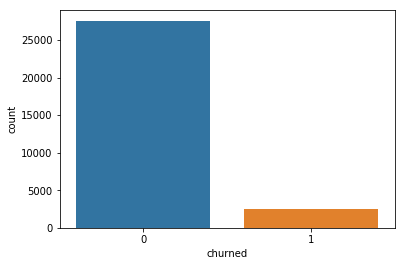

In [119]:
sns.countplot(hvc_cust['churned'])

In [120]:
# we can remove the 9 month columns now  as the churned customers have been identified.
month_9_cols=[i for i in hvc_cust if '_9' in i]
hvc_cust.drop(month_9_cols,axis=1,inplace=True)

In [121]:
mou_6_ic_cols=[i for i in month_6_cols if(('mou' in i) &('ic' in i)) ]
mou_6_og_cols=[i for i in month_6_cols if(('mou' in i) &('og' in i)) ]
mou_7_ic_cols=[i for i in month_7_cols if(('mou' in i) &('ic' in i)) ]
mou_7_og_cols=[i for i in month_7_cols if(('mou' in i) &('og' in i)) ]
mou_8_ic_cols=[i for i in month_8_cols if(('mou' in i) &('ic' in i)) ]
mou_8_og_cols=[i for i in month_8_cols if(('mou' in i) &('og' in i)) ]


### Imputing remaining missing values

### Analysing Minutes of usage for 6th month to impute missing values

In [122]:

print("6 month outgoing")
print("total is not zero  and column is null ")
for i in mou_6_og_cols:
    print(i," : ",len([(hvc_cust[i].isnull()) & ((hvc_cust['total_og_mou_6']!=0))]))

print("total is  zero  and column is not null or column is not zero ")

for i in mou_6_og_cols:
    print(i," : ",len(hvc_cust[~(hvc_cust[i].isnull()) &~(hvc_cust[i]==0)& ((hvc_cust['total_og_mou_6']==0))]))

    
print("total is  zero  and column is  null  ")

for i in mou_6_og_cols:
    print(i," : ",len(hvc_cust[(hvc_cust[i].isnull()) & ((hvc_cust['total_og_mou_6']==0))]))

6 month outgoing
total is not zero  and column is null 
roam_og_mou_6  :  1
loc_og_t2t_mou_6  :  1
loc_og_t2m_mou_6  :  1
loc_og_t2f_mou_6  :  1
loc_og_t2c_mou_6  :  1
loc_og_mou_6  :  1
std_og_t2t_mou_6  :  1
std_og_t2m_mou_6  :  1
std_og_t2f_mou_6  :  1
std_og_t2c_mou_6  :  1
std_og_mou_6  :  1
isd_og_mou_6  :  1
spl_og_mou_6  :  1
total_og_mou_6  :  1
total is  zero  and column is not null or column is not zero 
roam_og_mou_6  :  538
loc_og_t2t_mou_6  :  0
loc_og_t2m_mou_6  :  0
loc_og_t2f_mou_6  :  0
loc_og_t2c_mou_6  :  79
loc_og_mou_6  :  0
std_og_t2t_mou_6  :  0
std_og_t2m_mou_6  :  0
std_og_t2f_mou_6  :  0
std_og_t2c_mou_6  :  0
std_og_mou_6  :  0
isd_og_mou_6  :  0
spl_og_mou_6  :  0
total_og_mou_6  :  0
total is  zero  and column is  null  
roam_og_mou_6  :  545
loc_og_t2t_mou_6  :  545
loc_og_t2m_mou_6  :  545
loc_og_t2f_mou_6  :  545
loc_og_t2c_mou_6  :  545
loc_og_mou_6  :  545
std_og_t2t_mou_6  :  545
std_og_t2m_mou_6  :  545
std_og_t2f_mou_6  :  545
std_og_t2c_mou_6  :  

### The above values show that where the total is zero, the individual columns are either zero or nan. So the nan can be safely imputed to zero. But for roaming, we see that roaming has values even when total is zero. So we cannot impute roaming on basis of zero in total

In [123]:
hvc_cust[~(hvc_cust['loc_og_t2c_mou_6'].isnull()) &~(hvc_cust['loc_og_t2c_mou_6']==0)& ((hvc_cust['total_og_mou_6']==0))][mou_6_og_cols].head(10)

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
408,7.530000,0.000000,0.000000,0.000000,5.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
977,44.180000,0.000000,0.000000,0.000000,0.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1379,9.110000,0.000000,0.000000,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1501,0.590000,0.000000,0.000000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2448,10.040000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3500,373.480000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4439,5.030000,0.000000,0.000000,0.000000,5.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5009,109.140000,0.000000,0.000000,0.000000,2.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7735,17.460000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9421,1424.930000,0.000000,0.000000,0.000000,9.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [124]:
len(hvc_cust[~(hvc_cust['loc_og_t2c_mou_6'].isnull()) &~(df['loc_og_t2c_mou_6']==0)])

7353

#### Thus imputing all minutes of usage for 6 month columns as zero wherever the value is nan and the total is zero Except roaming.

In [125]:

mou_6_og_cols.remove('roam_og_mou_6')
mou_6_og_cols.remove('total_og_mou_6')



rule=(hvc_cust['total_og_mou_6']==0)
hvc_cust.loc[rule, mou_6_og_cols] = hvc_cust.loc[rule, mou_6_og_cols].fillna(0)

In [126]:
print("6 month incoming")
print("total is not zero  and column is null ")
for i in mou_6_ic_cols:
    print(i," : ",len([(hvc_cust[i].isnull()) & ((hvc_cust['total_ic_mou_6']!=0))]))

print("total is  zero  and column is not null or column is not zero ")

for i in mou_6_ic_cols:
    print(i," : ",len(hvc_cust[~(hvc_cust[i].isnull()) &~(hvc_cust[i]==0)& ((hvc_cust['total_ic_mou_6']==0))]))

    
print("total is  zero  and column is  null  ")

for i in mou_6_ic_cols:
    print(i," : ",len(hvc_cust[(hvc_cust[i].isnull()) & ((hvc_cust['total_ic_mou_6']==0))]))

6 month incoming
total is not zero  and column is null 
roam_ic_mou_6  :  1
loc_ic_t2t_mou_6  :  1
loc_ic_t2m_mou_6  :  1
loc_ic_t2f_mou_6  :  1
loc_ic_mou_6  :  1
std_ic_t2t_mou_6  :  1
std_ic_t2m_mou_6  :  1
std_ic_t2f_mou_6  :  1
std_ic_t2o_mou_6  :  1
std_ic_mou_6  :  1
total_ic_mou_6  :  1
spl_ic_mou_6  :  1
isd_ic_mou_6  :  1
total is  zero  and column is not null or column is not zero 
roam_ic_mou_6  :  529
loc_ic_t2t_mou_6  :  0
loc_ic_t2m_mou_6  :  0
loc_ic_t2f_mou_6  :  0
loc_ic_mou_6  :  0
std_ic_t2t_mou_6  :  0
std_ic_t2m_mou_6  :  0
std_ic_t2f_mou_6  :  0
std_ic_t2o_mou_6  :  0
std_ic_mou_6  :  0
total_ic_mou_6  :  0
spl_ic_mou_6  :  0
isd_ic_mou_6  :  0
total is  zero  and column is  null  
roam_ic_mou_6  :  545
loc_ic_t2t_mou_6  :  545
loc_ic_t2m_mou_6  :  545
loc_ic_t2f_mou_6  :  545
loc_ic_mou_6  :  545
std_ic_t2t_mou_6  :  545
std_ic_t2m_mou_6  :  545
std_ic_t2f_mou_6  :  545
std_ic_t2o_mou_6  :  545
std_ic_mou_6  :  545
total_ic_mou_6  :  0
spl_ic_mou_6  :  545
isd_i

In [127]:

mou_6_ic_cols.remove('roam_ic_mou_6')
mou_6_ic_cols.remove('total_ic_mou_6')



rule=(hvc_cust['total_ic_mou_6']==0)
hvc_cust.loc[rule, mou_6_ic_cols] = hvc_cust.loc[rule, mou_6_ic_cols].fillna(0)

In [128]:
for i in mou_7_og_cols:
    print(i," : ",len([(hvc_cust[i].isnull()) & ((hvc_cust['total_og_mou_7']!=0))]))

print("total is  zero  and column is not null or column is not zero ")

for i in mou_7_og_cols:
    print(i," : ",len(hvc_cust[~(hvc_cust[i].isnull()) &~(hvc_cust[i]==0)& ((hvc_cust['total_og_mou_7']==0))]))

    
print("total is  zero  and column is  null  ")

for i in mou_7_og_cols:
    print(i," : ",len(hvc_cust[(hvc_cust[i].isnull()) & ((hvc_cust['total_og_mou_7']==0))]))

roam_og_mou_7  :  1
loc_og_t2t_mou_7  :  1
loc_og_t2m_mou_7  :  1
loc_og_t2f_mou_7  :  1
loc_og_t2c_mou_7  :  1
loc_og_mou_7  :  1
std_og_t2t_mou_7  :  1
std_og_t2m_mou_7  :  1
std_og_t2f_mou_7  :  1
std_og_t2c_mou_7  :  1
std_og_mou_7  :  1
isd_og_mou_7  :  1
spl_og_mou_7  :  1
total_og_mou_7  :  1
total is  zero  and column is not null or column is not zero 
roam_og_mou_7  :  480
loc_og_t2t_mou_7  :  0
loc_og_t2m_mou_7  :  0
loc_og_t2f_mou_7  :  0
loc_og_t2c_mou_7  :  71
loc_og_mou_7  :  0
std_og_t2t_mou_7  :  0
std_og_t2m_mou_7  :  0
std_og_t2f_mou_7  :  0
std_og_t2c_mou_7  :  0
std_og_mou_7  :  0
isd_og_mou_7  :  0
spl_og_mou_7  :  0
total_og_mou_7  :  0
total is  zero  and column is  null  
roam_og_mou_7  :  537
loc_og_t2t_mou_7  :  537
loc_og_t2m_mou_7  :  537
loc_og_t2f_mou_7  :  537
loc_og_t2c_mou_7  :  537
loc_og_mou_7  :  537
std_og_t2t_mou_7  :  537
std_og_t2m_mou_7  :  537
std_og_t2f_mou_7  :  537
std_og_t2c_mou_7  :  537
std_og_mou_7  :  537
isd_og_mou_7  :  537
spl_og_mou

#### Thus imputing all minutes of usage for 7 month columns as zero wherever the value is nan and the total is zero Except roaming.


In [129]:

mou_7_og_cols.remove('roam_og_mou_7')
mou_7_og_cols.remove('total_og_mou_7')



rule=(hvc_cust['total_og_mou_7']==0)
hvc_cust.loc[rule, mou_7_og_cols] = hvc_cust.loc[rule, mou_7_og_cols].fillna(0)

In [130]:
print("7 month incoming")
print("total is not zero  and column is null ")
for i in mou_7_ic_cols:
    print(i," : ",len([(hvc_cust[i].isnull()) & ((hvc_cust['total_ic_mou_7']!=0))]))

print("total is  zero  and column is not null or column is not zero ")

for i in mou_7_ic_cols:
    print(i," : ",len(hvc_cust[~(hvc_cust[i].isnull()) &~(hvc_cust[i]==0)& ((hvc_cust['total_ic_mou_7']==0))]))

    
print("total is  zero  and column is  null  ")

for i in mou_7_ic_cols:
    print(i," : ",len(hvc_cust[(hvc_cust[i].isnull()) & ((hvc_cust['total_ic_mou_7']==0))]))

7 month incoming
total is not zero  and column is null 
roam_ic_mou_7  :  1
loc_ic_t2t_mou_7  :  1
loc_ic_t2m_mou_7  :  1
loc_ic_t2f_mou_7  :  1
loc_ic_mou_7  :  1
std_ic_t2t_mou_7  :  1
std_ic_t2m_mou_7  :  1
std_ic_t2f_mou_7  :  1
std_ic_t2o_mou_7  :  1
std_ic_mou_7  :  1
total_ic_mou_7  :  1
spl_ic_mou_7  :  1
isd_ic_mou_7  :  1
total is  zero  and column is not null or column is not zero 
roam_ic_mou_7  :  462
loc_ic_t2t_mou_7  :  0
loc_ic_t2m_mou_7  :  0
loc_ic_t2f_mou_7  :  0
loc_ic_mou_7  :  0
std_ic_t2t_mou_7  :  0
std_ic_t2m_mou_7  :  0
std_ic_t2f_mou_7  :  0
std_ic_t2o_mou_7  :  0
std_ic_mou_7  :  0
total_ic_mou_7  :  0
spl_ic_mou_7  :  0
isd_ic_mou_7  :  0
total is  zero  and column is  null  
roam_ic_mou_7  :  537
loc_ic_t2t_mou_7  :  537
loc_ic_t2m_mou_7  :  537
loc_ic_t2f_mou_7  :  537
loc_ic_mou_7  :  537
std_ic_t2t_mou_7  :  537
std_ic_t2m_mou_7  :  537
std_ic_t2f_mou_7  :  537
std_ic_t2o_mou_7  :  537
std_ic_mou_7  :  537
total_ic_mou_7  :  0
spl_ic_mou_7  :  537
isd_i

In [131]:
mou_7_ic_cols.remove('roam_ic_mou_7')
mou_7_ic_cols.remove('total_ic_mou_7')



rule=(hvc_cust['total_ic_mou_7']==0)
hvc_cust.loc[rule, mou_7_ic_cols] = hvc_cust.loc[rule, mou_7_ic_cols].fillna(0)

In [132]:
print("8 month outgoing")
print("total is not zero  and column is null ")
for i in mou_8_og_cols:
    print(i," : ",len([(hvc_cust[i].isnull()) & ((hvc_cust['total_og_mou_8']!=0))]))

print("total is  zero  and column is not null or column is not zero ")

for i in mou_8_og_cols:
    print(i," : ",len(hvc_cust[~(hvc_cust[i].isnull()) &~(hvc_cust[i]==0)& ((hvc_cust['total_og_mou_8']==0))]))

    
print("total is  zero  and column is  null  ")

for i in mou_8_og_cols:
    print(i," : ",len(hvc_cust[(hvc_cust[i].isnull()) & ((hvc_cust['total_og_mou_8']==0))]))


8 month outgoing
total is not zero  and column is null 
roam_og_mou_8  :  1
loc_og_t2t_mou_8  :  1
loc_og_t2m_mou_8  :  1
loc_og_t2f_mou_8  :  1
loc_og_t2c_mou_8  :  1
loc_og_mou_8  :  1
std_og_t2t_mou_8  :  1
std_og_t2m_mou_8  :  1
std_og_t2f_mou_8  :  1
std_og_t2c_mou_8  :  1
std_og_mou_8  :  1
isd_og_mou_8  :  1
spl_og_mou_8  :  1
total_og_mou_8  :  1
total is  zero  and column is not null or column is not zero 
roam_og_mou_8  :  843
loc_og_t2t_mou_8  :  0
loc_og_t2m_mou_8  :  0
loc_og_t2f_mou_8  :  0
loc_og_t2c_mou_8  :  100
loc_og_mou_8  :  0
std_og_t2t_mou_8  :  0
std_og_t2m_mou_8  :  0
std_og_t2f_mou_8  :  0
std_og_t2c_mou_8  :  0
std_og_mou_8  :  0
isd_og_mou_8  :  0
spl_og_mou_8  :  0
total_og_mou_8  :  0
total is  zero  and column is  null  
roam_og_mou_8  :  1174
loc_og_t2t_mou_8  :  1174
loc_og_t2m_mou_8  :  1174
loc_og_t2f_mou_8  :  1174
loc_og_t2c_mou_8  :  1174
loc_og_mou_8  :  1174
std_og_t2t_mou_8  :  1174
std_og_t2m_mou_8  :  1174
std_og_t2f_mou_8  :  1174
std_og_t2c_

#### Thus imputing all minutes of usage for 6 month columns as zero wherever the value is nan and the total is zero Except roaming.


In [133]:
mou_8_og_cols.remove('roam_og_mou_8')
mou_8_og_cols.remove('total_og_mou_8')



rule=(hvc_cust['total_og_mou_8']==0)
hvc_cust.loc[rule, mou_8_og_cols] = hvc_cust.loc[rule, mou_8_og_cols].fillna(0)

In [134]:
print("8 month incoming")
print("total is not zero  and column is null ")
for i in mou_8_ic_cols:
    print(i," : ",len([(hvc_cust[i].isnull()) & ((hvc_cust['total_ic_mou_8']!=0))]))

print("total is  zero  and column is not null or column is not zero ")

for i in mou_8_ic_cols:
    print(i," : ",len(hvc_cust[~(hvc_cust[i].isnull()) &~(hvc_cust[i]==0)& ((hvc_cust['total_ic_mou_8']==0))]))

    
print("total is  zero  and column is  null  ")

for i in mou_8_ic_cols:
    print(i," : ",len(hvc_cust[(hvc_cust[i].isnull()) & ((hvc_cust['total_ic_mou_8']==0))]))

8 month incoming
total is not zero  and column is null 
roam_ic_mou_8  :  1
loc_ic_t2t_mou_8  :  1
loc_ic_t2m_mou_8  :  1
loc_ic_t2f_mou_8  :  1
loc_ic_mou_8  :  1
std_ic_t2t_mou_8  :  1
std_ic_t2m_mou_8  :  1
std_ic_t2f_mou_8  :  1
std_ic_t2o_mou_8  :  1
std_ic_mou_8  :  1
total_ic_mou_8  :  1
spl_ic_mou_8  :  1
isd_ic_mou_8  :  1
total is  zero  and column is not null or column is not zero 
roam_ic_mou_8  :  855
loc_ic_t2t_mou_8  :  0
loc_ic_t2m_mou_8  :  0
loc_ic_t2f_mou_8  :  0
loc_ic_mou_8  :  0
std_ic_t2t_mou_8  :  0
std_ic_t2m_mou_8  :  0
std_ic_t2f_mou_8  :  0
std_ic_t2o_mou_8  :  0
std_ic_mou_8  :  0
total_ic_mou_8  :  0
spl_ic_mou_8  :  0
isd_ic_mou_8  :  0
total is  zero  and column is  null  
roam_ic_mou_8  :  1174
loc_ic_t2t_mou_8  :  1174
loc_ic_t2m_mou_8  :  1174
loc_ic_t2f_mou_8  :  1174
loc_ic_mou_8  :  1174
std_ic_t2t_mou_8  :  1174
std_ic_t2m_mou_8  :  1174
std_ic_t2f_mou_8  :  1174
std_ic_t2o_mou_8  :  1174
std_ic_mou_8  :  1174
total_ic_mou_8  :  0
spl_ic_mou_8  : 

In [135]:
mou_8_ic_cols.remove('roam_ic_mou_8')
mou_8_ic_cols.remove('total_ic_mou_8')



rule=(hvc_cust['total_ic_mou_8']==0)
hvc_cust.loc[rule, mou_8_ic_cols] = hvc_cust.loc[rule, mou_8_ic_cols].fillna(0)

In [136]:
hvc_missing_values=round(hvc_cust.isnull().sum()/len(hvc_cust),6)*100


In [137]:
hvc_missing_values[hvc_missing_values>0]

loc_og_t2o_mou              0.746600
std_og_t2o_mou              0.746600
loc_ic_t2o_mou              0.746600
onnet_mou_6                 1.816600
onnet_mou_7                 1.789900
onnet_mou_8                 3.913200
offnet_mou_6                1.816600
offnet_mou_7                1.789900
offnet_mou_8                3.913200
roam_ic_mou_6               1.816600
roam_ic_mou_7               1.789900
roam_ic_mou_8               3.913200
roam_og_mou_6               1.816600
roam_og_mou_7               1.789900
roam_og_mou_8               3.913200
og_others_6                 1.816600
og_others_7                 1.789900
og_others_8                 3.913200
ic_others_6                 1.816600
ic_others_7                 1.789900
ic_others_8                 3.913200
date_of_last_rech_6         0.243300
date_of_last_rech_7         0.326700
date_of_last_rech_8         1.943300
date_of_last_rech_data_6   44.148500
date_of_last_rech_data_7   43.145200
date_of_last_rech_data_8   46.825100
a

#### From mou, recharge columns we are getting the month wise details of the recharge, hence we do not explicitly need date columns


In [138]:
date_cols=['date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_data_8',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8']

hvc_cust.drop(date_cols,axis=1,inplace=True)

In [139]:
hvc_missing_values=round(hvc_cust.isnull().sum()/len(hvc_cust),6)*100
hvc_missing_values[hvc_missing_values>0]


loc_og_t2o_mou      0.746600
std_og_t2o_mou      0.746600
loc_ic_t2o_mou      0.746600
onnet_mou_6         1.816600
onnet_mou_7         1.789900
onnet_mou_8         3.913200
offnet_mou_6        1.816600
offnet_mou_7        1.789900
offnet_mou_8        3.913200
roam_ic_mou_6       1.816600
roam_ic_mou_7       1.789900
roam_ic_mou_8       3.913200
roam_og_mou_6       1.816600
roam_og_mou_7       1.789900
roam_og_mou_8       3.913200
og_others_6         1.816600
og_others_7         1.789900
og_others_8         3.913200
ic_others_6         1.816600
ic_others_7         1.789900
ic_others_8         3.913200
arpu_3g_6          44.148500
arpu_3g_7          43.145200
arpu_3g_8          46.825100
arpu_2g_6          44.148500
arpu_2g_7          43.145200
arpu_2g_8          46.825100
night_pck_user_6   44.148500
night_pck_user_7   43.145200
night_pck_user_8   46.825100
fb_user_6          44.148500
fb_user_7          43.145200
fb_user_8          46.825100
dtype: float64

In [140]:
hvc_cust[['night_pck_user_6','arpu_2g_8']].head(10)

,night_pck_user_6,arpu_2g_8
0,0.000000,212.170000
7,nan,nan
8,nan,0.000000
21,nan,nan
23,nan,150.670000
33,1.000000,391.920000
38,nan,nan
41,nan,nan
48,nan,nan
53,0.000000,0.000000


In [141]:
print(hvc_cust['night_pck_user_6'].value_counts())
print(hvc_cust['night_pck_user_7'].value_counts())
print(hvc_cust['night_pck_user_8'].value_counts())

0.000000    16349
1.000000      407
Name: night_pck_user_6, dtype: int64
0.000000    16682
1.000000      375
Name: night_pck_user_7, dtype: int64
0.000000    15612
1.000000      341
Name: night_pck_user_8, dtype: int64


#### Imputing with the mode which is obviously zero seen in the value counts above

In [142]:
hvc_cust['night_pck_user_6'].fillna(0,inplace=True)
hvc_cust['night_pck_user_7'].fillna(0,inplace=True)
hvc_cust['night_pck_user_8'].fillna(0,inplace=True)

In [143]:
print(hvc_cust['fb_user_6'].value_counts())
print(hvc_cust['fb_user_7'].value_counts())
print(hvc_cust['fb_user_8'].value_counts())

1.000000    15525
0.000000     1231
Name: fb_user_6, dtype: int64
1.000000    15722
0.000000     1335
Name: fb_user_7, dtype: int64
1.000000    14313
0.000000     1640
Name: fb_user_8, dtype: int64


#### Imputing with the mode which is obviously 1 seen in the value counts above

In [144]:
hvc_cust['fb_user_6'].fillna(1,inplace=True)
hvc_cust['fb_user_7'].fillna(1,inplace=True)
hvc_cust['fb_user_8'].fillna(1,inplace=True)


In [145]:
hvc_missing_values=round(hvc_cust.isnull().sum()/len(hvc_cust),6)*100
hvc_missing_values[hvc_missing_values>0].sort_values(ascending=False)

arpu_2g_8        46.825100
arpu_3g_8        46.825100
arpu_2g_6        44.148500
arpu_3g_6        44.148500
arpu_3g_7        43.145200
arpu_2g_7        43.145200
roam_og_mou_8     3.913200
onnet_mou_8       3.913200
roam_ic_mou_8     3.913200
og_others_8       3.913200
ic_others_8       3.913200
offnet_mou_8      3.913200
og_others_6       1.816600
offnet_mou_6      1.816600
ic_others_6       1.816600
roam_og_mou_6     1.816600
onnet_mou_6       1.816600
roam_ic_mou_6     1.816600
onnet_mou_7       1.789900
roam_og_mou_7     1.789900
offnet_mou_7      1.789900
roam_ic_mou_7     1.789900
og_others_7       1.789900
ic_others_7       1.789900
loc_ic_t2o_mou    0.746600
std_og_t2o_mou    0.746600
loc_og_t2o_mou    0.746600
dtype: float64

In [146]:
print(hvc_cust['loc_ic_t2o_mou'].value_counts())
print(hvc_cust['std_og_t2o_mou'].value_counts())
print(hvc_cust['loc_og_t2o_mou'].value_counts())

0.000000    29777
Name: loc_ic_t2o_mou, dtype: int64
0.000000    29777
Name: std_og_t2o_mou, dtype: int64
0.000000    29777
Name: loc_og_t2o_mou, dtype: int64


#### loc_ic_t2o_mou   , std_og_t2o_mou   ,loc_og_t2o_mou  these columns have very less missing values and the variance is zero as well. so dropping these columns


In [147]:

hvc_cust.drop(['loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou'],axis=1,inplace=True)

In [148]:
hvc_missing_values=round(hvc_cust.isnull().sum()/len(hvc_cust),6)*100
hvc_missing_values[hvc_missing_values>0].sort_values(ascending=False)

arpu_2g_8       46.825100
arpu_3g_8       46.825100
arpu_2g_6       44.148500
arpu_3g_6       44.148500
arpu_2g_7       43.145200
arpu_3g_7       43.145200
onnet_mou_8      3.913200
offnet_mou_8     3.913200
roam_ic_mou_8    3.913200
roam_og_mou_8    3.913200
og_others_8      3.913200
ic_others_8      3.913200
og_others_6      1.816600
roam_og_mou_6    1.816600
ic_others_6      1.816600
roam_ic_mou_6    1.816600
offnet_mou_6     1.816600
onnet_mou_6      1.816600
og_others_7      1.789900
roam_og_mou_7    1.789900
roam_ic_mou_7    1.789900
ic_others_7      1.789900
offnet_mou_7     1.789900
onnet_mou_7      1.789900
dtype: float64

In [149]:
hvc_cust[hvc_missing_values[hvc_missing_values>0].index].head(10)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
0,nan,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,212.170000,212.170000,212.170000,212.170000,212.170000,212.170000
7,57.840000,54.680000,52.290000,453.430000,567.160000,325.910000,16.230000,33.490000,31.640000,23.740000,12.590000,38.060000,0.000000,0.000000,0.000000,15.740000,15.190000,15.140000,nan,nan,nan,nan,nan,nan
8,413.690000,351.030000,35.080000,94.660000,80.630000,136.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,19.830000,nan,0.000000,0.000000
21,102.410000,132.110000,85.140000,757.930000,896.680000,983.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,nan,nan
23,48.960000,50.660000,33.580000,85.410000,89.360000,205.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.350000,13.060000,nan,306.570000,197.270000,nan,301.780000,150.670000
33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.230000,0.650000,0.200000,897.600000,2294.030000,405.260000,931.580000,2200.200000,391.920000
38,248.990000,619.960000,666.380000,88.860000,50.580000,97.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,nan,nan
41,86.390000,118.880000,80.440000,232.360000,280.780000,136.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560000,0.000000,0.350000,nan,nan,nan,nan,nan,nan
48,2061.690000,881.430000,156.910000,1087.760000,258.290000,68.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.450000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,nan,nan
53,135.140000,119.590000,102.690000,479.310000,543.180000,261.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000


In [150]:
print(hvc_cust['og_others_6'].value_counts())
print(hvc_cust['og_others_7'].value_counts())
print(hvc_cust['og_others_8'].value_counts())


0.000000     22606
0.210000       151
0.430000        67
0.860000        53
0.200000        52
0.650000        50
0.710000        49
0.680000        49
0.610000        48
0.760000        48
0.560000        47
0.660000        46
0.400000        45
0.810000        42
0.630000        42
1.480000        41
0.830000        41
1.410000        40
0.380000        40
1.360000        40
0.780000        39
1.060000        38
0.700000        38
0.930000        38
0.910000        38
0.980000        37
0.410000        37
1.510000        36
0.600000        35
1.610000        35
0.850000        35
1.130000        35
0.800000        34
1.330000        34
1.010000        34
1.030000        34
1.080000        33
1.460000        33
0.550000        33
0.730000        33
0.510000        33
0.360000        33
0.750000        32
1.430000        32
0.530000        32
1.310000        32
1.210000        32
1.260000        32
0.900000        32
1.180000        31
0.500000        31
1.780000        30
1.630000    

### Handling remaining missing values which cannot be imputed easily. Using fancyimpute

In [151]:
#fancy impute removes column names.

train_cols = hvc_missing_values[hvc_missing_values>0].index
# missing features
train_clean = pd.DataFrame(IterativeImputer(random_state=100).fit_transform(hvc_cust[hvc_missing_values[hvc_missing_values>0].index]))
train_clean.columns = train_cols

In [152]:
hvc_missing_values=round(train_clean.isnull().sum()/len(train_clean),6)*100
hvc_missing_values[hvc_missing_values>0].sort_values(ascending=False)

Series([], dtype: float64)

In [153]:
train_clean.shape

(30001, 24)

In [154]:
train_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [155]:
#df.columns is the order
#hvc_cust has main columns train_clean has remaining 24 columns
# copying it to third dataframe new_df

hvc_cust_1=hvc_cust.drop(train_cols,axis=1)
new_df=pd.concat([hvc_cust_1.reset_index(),train_clean.reset_index()],axis=1)
hvc_cust=new_df[hvc_cust.columns]

In [156]:
hvc_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_6,total_rech_amt_data_7,total_rech_7,total_rech_6_7,total_rech_amt_data_8,total_rech_8,churned
0,7000842753,197.385000,214.816000,213.803000,111.434772,63.791867,0.000000,160.310283,90.984715,0.000000,8.743609,5.329041,0.000000,11.674659,8.108427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.534712,0.023748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,4.130000,0.000000,0.000000,1.150000,0.000000,0.000000,5.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.376270,0.443529,0.000000,4,3,2,362,252,252,252,252,252,252,252,252,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,30.130000,1.320000,5.750000,83.570000,150.760000,109.610000,212.170000,212.170000,212.170000,212.170000,212.170000,212.170000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,1,1,0,0,0,1.000000,1.000000,1.000000,968,30.400000,0.000000,101.200000,3.580000,252.000000,614.000000,252.000000,504.000000,559.000000,252.000000,504.000000,1
1,7000701601,1069.180000,1349.850000,3171.480000,57.840000,54.680000,52.290000,453.430000,567.160000,325.910000,16.230000,33.490000,31.640000,23.740000,12.59000

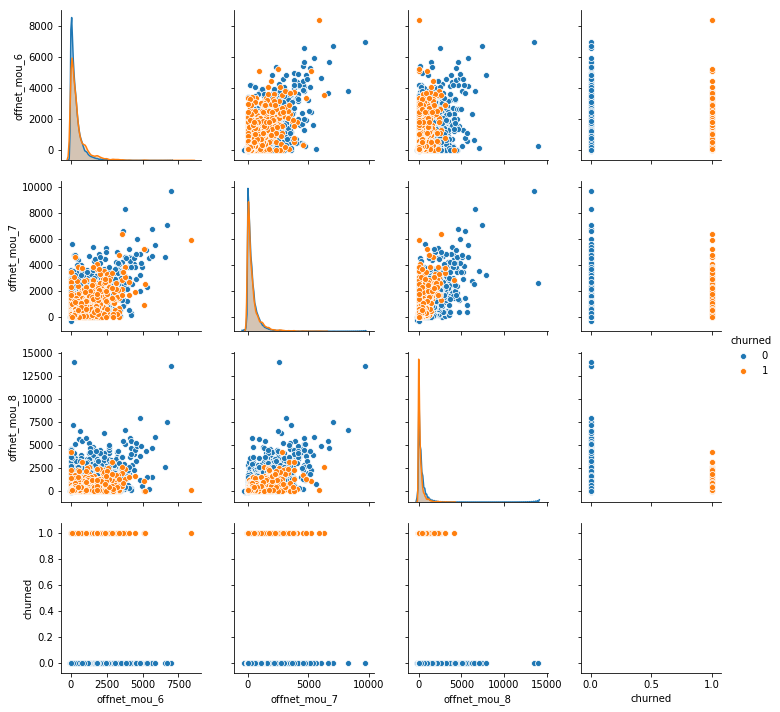

In [157]:
sns.pairplot(data=hvc_cust[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churned']],hue='churned')


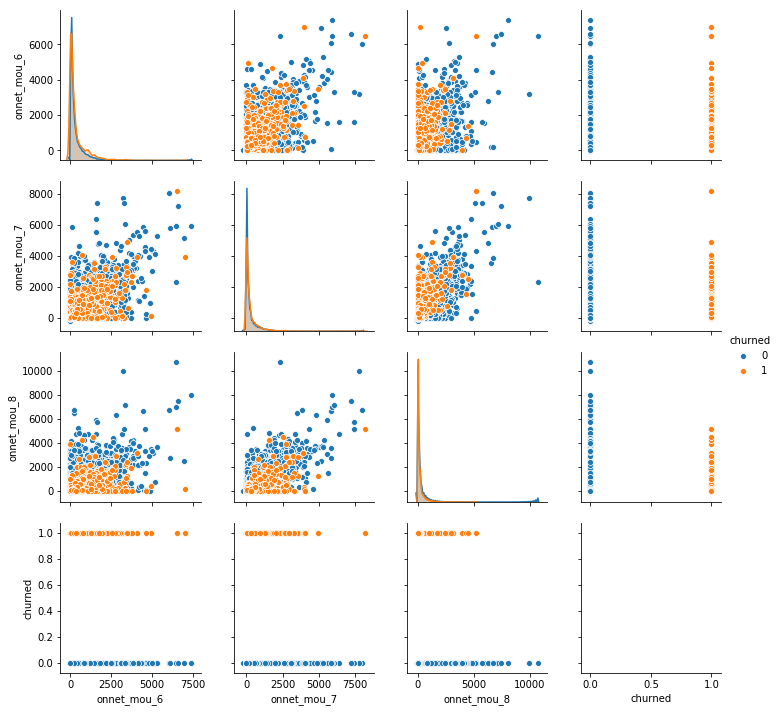

In [158]:
sns.pairplot(data=hvc_cust[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churned']],hue='churned')


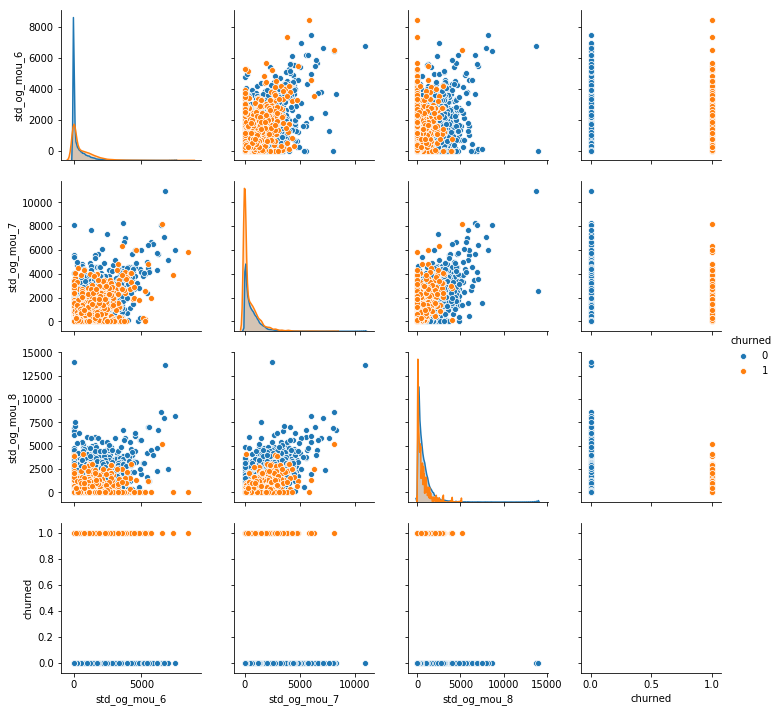

In [159]:
sns.pairplot(data=hvc_cust[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churned']],hue='churned')


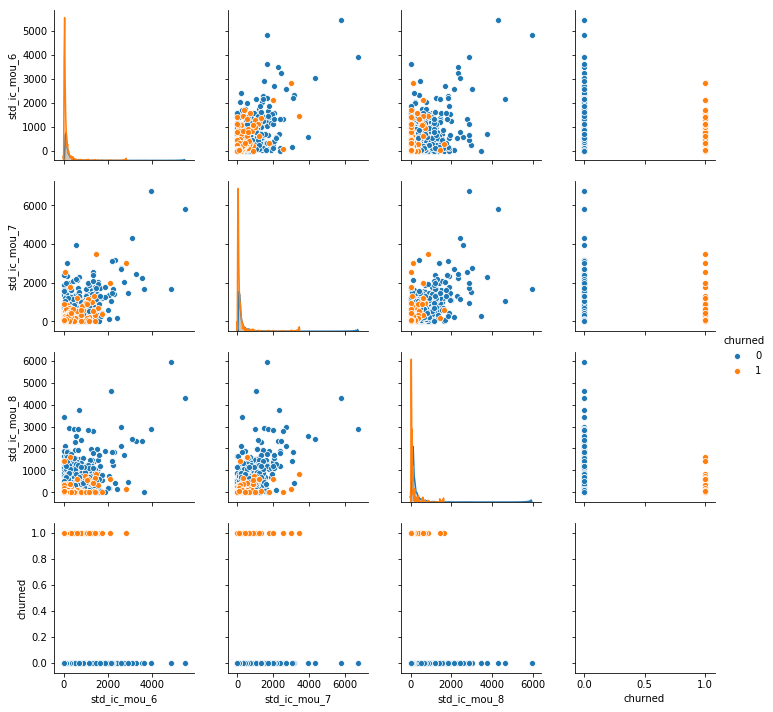

In [160]:
sns.pairplot(data=hvc_cust[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churned']],hue='churned')


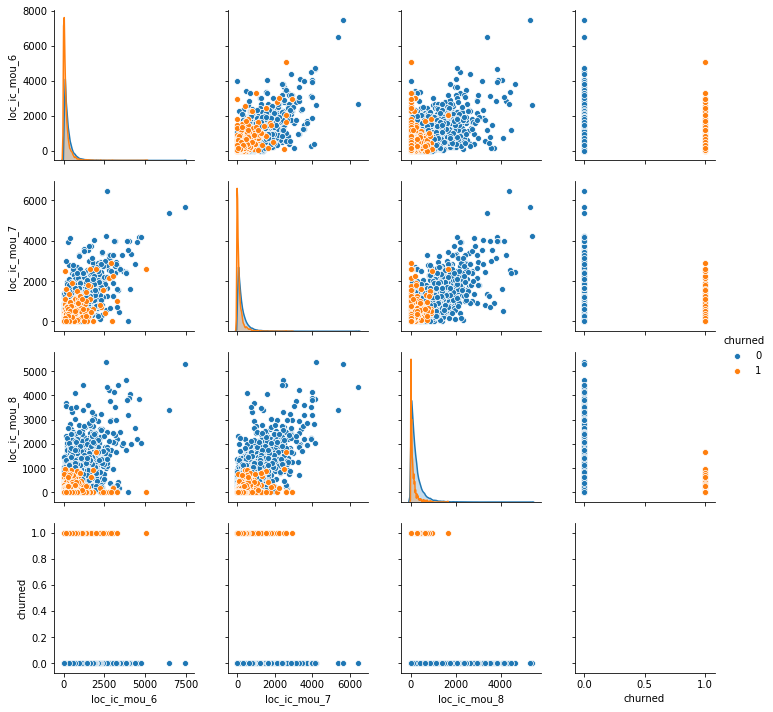

In [161]:
sns.pairplot(data=hvc_cust[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churned']],hue='churned')


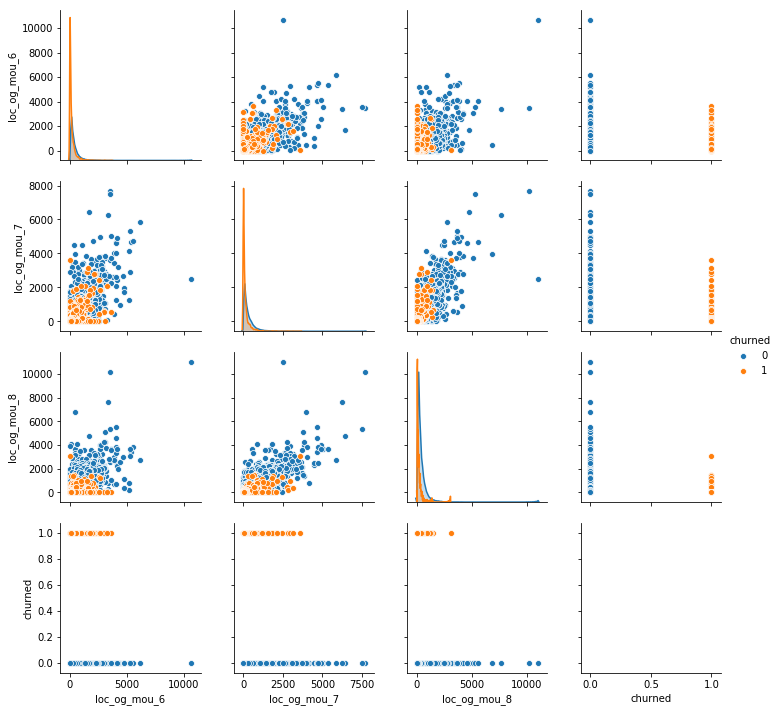

In [162]:
sns.pairplot(data=hvc_cust[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churned']],hue='churned')


### All the graphs clearly show that, the churned customers consistently show a behaviour of not using the std or local calls for the particular operator as the cluster of churned customers clearly form near zero.

### Outlier Handling

In [163]:
hvc_cust.describe(percentiles=[0.01, 0.05, .25, .5, .75, .95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_6,total_rech_amt_data_7,total_rech_7,total_rech_6_7,total_rech_amt_data_8,total_rech_8,churned
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000

### Cap the columns to 0.01 and 0.99 percentile


In [164]:
col_to_cap = hvc_cust.columns
col_to_cap = col_to_cap.drop(['mobile_number', 'churned'])

In [165]:
for i in col_to_cap:
    max=hvc_cust[i].quantile(0.99)
    min=hvc_cust[i].quantile(0.01)
    hvc_cust[i] = hvc_cust[i].apply(lambda x: max if x>max else x)
    hvc_cust[i] = hvc_cust[i].apply(lambda x: min if x<min else x)
   

In [166]:
hvc_cust.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_6,total_rech_amt_data_7,total_rech_7,total_rech_6_7,total_rech_amt_data_8,total_rech_8,churned
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000

## Modelling

### Scaling

In [167]:
hvc_cust.tail()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_6,total_rech_amt_data_7,total_rech_7,total_rech_6_7,total_rech_amt_data_8,total_rech_8,churned
29996,7000630859,384.316000,255.405000,393.474000,78.680000,29.040000,103.240000,56.130000,28.090000,61.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.530000,29.040000,89.230000,52.210000,20.890000,55.590000,0.000000,0.000000,5.760000,3.910000,0.000000,0.000000,124.740000,49.940000,150.590000,6.150000,0.000000,14.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.150000,0.000000,14.010000,0.000000,0.000000,0.000000,3.910000,7.200000,0.080000,0.000000,0.000000,0.000000,134.810000,57.140000,164.690000,285.330000,264.440000,303.610000,93.360000,61.560000,58.540000,0.300000,11.260000,40.410000,378.990000,337.280000,402.580000,57.600000,0.910000,17.360000,0.000000,0.000000,0.000000,41.590000,6.510000,0.000000,0.000000,0.000000,0.000000,99.190000,7.430000,17.360000,478.480000,344.780000,420.460000,0.130000,0.000000,0.000000,0.000000,0.060000,0.000000,0.150000,0.000000,0.510000,2.000000,4.000000,3.000000,252.000000,372.000000,512.000000,252.000000,252.000000,252.000000,252.000000,0.000000,130.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,54.810000,101.020000,112.070000,692.720000,596.910000,1012.700000,212.180000,212.180000,212.200000,212.170000,212.170000,212.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,473.000000,1100.430000,619.590000,668.050000,0.330000,252.00

In [168]:
#lets scale the data first to bring the data on same unit
X = hvc_cust.drop(["mobile_number", 'churned'], axis = 1) 
y = hvc_cust['churned']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
standard_scaler = StandardScaler()
scaled_X_train = standard_scaler.fit_transform(X_train)
scaled_X_test  = standard_scaler.transform(X_test)

In [169]:
scaled_X_train

array([[ 1.50716776,  0.99015053,  0.24455547, ...,  0.08575323,
        -0.44494621, -0.30101071],
       [-0.09987376, -0.66763233, -0.35214657, ..., -0.22937521,
        -0.33836802, -0.36619743],
       [-0.70300514, -0.66049387, -0.48459527, ..., -0.60775124,
        -0.44494621, -0.57081131],
       ...,
       [-0.78195712, -1.52713216, -1.26804009, ..., -0.68320453,
        -0.44494621, -0.89674491],
       [ 1.49077996, -0.30020405, -0.6399592 , ..., -0.26876626,
        -0.44494621, -0.63418729],
       [ 1.92723153,  2.85181131,  1.51880918, ...,  0.62002907,
        -0.44494621,  0.21776694]])

In [170]:
scaled_X_test 

array([[-0.02728562, -0.04191549, -0.56913483, ..., -0.42244685,
        -0.44494621, -0.62332283],
       [-1.31690653, -0.95395136, -1.09716431, ..., -0.26932106,
        -0.20025137, -0.62060672],
       [ 0.47104298,  0.46820711,  0.33037985, ...,  0.09352048,
        -0.44494621, -0.20594675],
       ...,
       [ 0.54801204,  0.60234803,  0.69696602, ...,  0.40476528,
        -0.27746619,  0.07019145],
       [-0.98074501, -1.12837554, -1.22399585, ...,  0.18672748,
        -0.37099399, -0.80439706],
       [ 0.42102978,  2.4260875 ,  2.29538334, ...,  0.25718753,
        -0.44494621,  0.48032457]])

**PCA**

In [171]:
pca = PCA(svd_solver='randomized', random_state=42)

In [172]:
#Perform the PCA on scaled data
pca.fit_transform(scaled_X_train)

array([[-1.12916363e+00,  8.24539925e-01, -1.00580655e+00, ...,
         5.56079207e-16, -2.73595159e-16, -1.59167583e-16],
       [ 1.87639131e-02, -2.07516690e-01, -3.34721378e+00, ...,
        -6.35135198e-17, -1.42348205e-16,  4.58044342e-17],
       [-4.44403858e-01, -2.99464544e+00, -1.91159700e+00, ...,
         8.87655104e-17, -3.61607482e-17,  1.65980778e-16],
       ...,
       [ 2.12017451e+00, -4.01785895e+00, -2.83995164e+00, ...,
         2.34517113e-17,  7.96184798e-18,  4.50671240e-18],
       [-3.95651777e+00, -1.24590212e-01, -1.30127276e+00, ...,
         5.46313923e-18, -1.46533056e-17, -9.05261753e-18],
       [-9.73081482e+00,  3.67037650e+00,  3.12249810e+00, ...,
        -1.66659913e-18, -7.25358122e-19, -7.61355385e-18]])

In [173]:
#List of PCA components.
pca.components_

array([[-9.48617963e-02, -1.00265336e-01, -8.69230095e-02, ...,
         9.51758100e-02,  1.28069055e-01,  7.01567222e-02],
       [ 1.19983630e-01,  1.28861591e-01,  1.39473231e-01, ...,
         1.10269321e-01,  6.03343470e-02,  1.07936919e-01],
       [ 9.76943915e-02,  1.27309301e-01,  1.08479942e-01, ...,
         1.09059941e-01,  5.79219657e-02,  9.46752871e-02],
       ...,
       [ 0.00000000e+00, -4.79235340e-18, -5.93837336e-17, ...,
         1.19192359e-16, -5.02784952e-16,  2.16900262e-16],
       [ 0.00000000e+00,  3.87480626e-18,  1.06868581e-16, ...,
        -5.90584067e-17, -1.05054176e-16,  1.07624688e-16],
       [-0.00000000e+00, -1.89132259e-16, -1.96954233e-16, ...,
         1.47644696e-16, -3.19412914e-16,  2.20786981e-16]])

In [174]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([1.15343488e-01, 1.06978450e-01, 6.94658373e-02, 6.12902725e-02,
       3.91286229e-02, 2.88791388e-02, 2.65415796e-02, 2.52673484e-02,
       2.29620279e-02, 2.22057641e-02, 2.07780369e-02, 1.88873488e-02,
       1.79595842e-02, 1.55068164e-02, 1.52410001e-02, 1.46943218e-02,
       1.43586305e-02, 1.36972546e-02, 1.32647667e-02, 1.23661699e-02,
       1.20142660e-02, 1.03506477e-02, 1.01875088e-02, 9.63344378e-03,
       9.25254208e-03, 8.64379201e-03, 8.23011902e-03, 8.08181279e-03,
       7.53266995e-03, 7.23117816e-03, 7.00247009e-03, 6.85264975e-03,
       6.65387628e-03, 6.51253716e-03, 6.37419238e-03, 5.98739089e-03,
       5.69879539e-03, 5.42285930e-03, 5.37289589e-03, 5.35117847e-03,
       5.15651388e-03, 5.01292686e-03, 4.96891177e-03, 4.87188068e-03,
       4.75904537e-03, 4.60291160e-03, 4.51150135e-03, 4.20921623e-03,
       4.16054861e-03, 4.09946378e-03, 4.05353165e-03, 3.95209464e-03,
       3.84891082e-03, 3.65159062e-03, 3.61886019e-03, 3.55390905e-03,
      

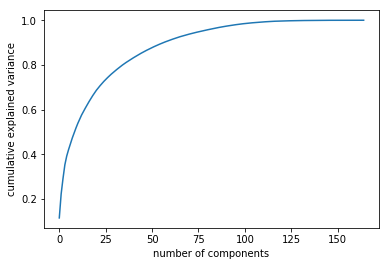

In [175]:
#Plotting the scree plot to cross verify the no. of variance explained by the PCs
%matplotlib inline
#fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### From the above graph we can observe that 75 components explain over  90% of the variance

In [176]:
pc2 = PCA(n_components = 75, svd_solver='randomized', random_state=42)
pca_X_train = pc2.fit_transform(scaled_X_train)
pca_X_test = pc2.transform(scaled_X_test)

#Making a dataframe out of it for convenience

df = pd.DataFrame(pca_X_train, columns=np.arange(75))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,-1.129164,0.824540,-1.005807,-3.090976,2.653927,4.544121,1.211075,5.012094,8.291486,0.523875,10.591599,-0.888836,0.453720,-0.383384,-0.348204,1.273841,1.750717,0.307595,-4.893017,2.520130,-2.777405,-1.299901,1.656010,0.240138,-3.222323,0.378103,0.165428,-1.078499,-0.031462,0.552161,-1.040439,-1.460271,-0.685312,-0.491917,0.535067,0.892521,0.407663,-0.505013,0.380522,0.544110,1.675922,-1.210198,0.157931,1.615475,-0.306421,-0.826084,-0.918736,-0.549556,0.834953,-1.018671,-0.469421,0.580115,0.135004,0.286827,-0.524017,0.012925,0.023031,0.011502,0.171853,0.155633,-0.159460,0.052342,0.513376,0.138526,0.278489,-0.169837,1.485550,0.488661,0.254629,1.561857,-0.590014,0.033429,0.577545,1.838071,0.169173
1,0.018764,-0.207517,-3.347213,0.508289,1.631280,0.617486,0.432243,-0.111504,2.003679,0.476203,-1.366721,1.144763,-0.280802,-0.052844,0.935704,-0.992774,-0.274797,-0.527409,1.577787,-0.110770,0.407256,-0.178793,-0.044205,-0.305065,-1.353474,0.813259,0.211019,-0.004425,-0.023447,-0.192411,0.893638,-0.020697,-0.198429,-0.818740,0.314035,1.893732,-0.125257,-1.012984,1.285641,0.000810,1.871458,-0.482293,-0.858508,0.026514,1.271212,0.518301,0.966855,0.369464,1.113478,-1.302980,0.201061,-0.153921,0.244536,-0.637757,-0.107210,0.429697,-0.698123,-0.285007,0.227836,0.170324,-0.240468,-2.899800,-0.187836,0.296060,0.022279,0.388292,-0.454284,-1.191739,0.252809,1.672050,1.158746,0.159904,-0.659546,0.357185,0.213487
2,-0.444404,-2.994645,-1.911597,-0.448520,1.087350,0.792320,-0.227204,1.187748,-0.887328,-1.109386,0.796990,-0.590622,-0.191910,-0.001967,0.293152,0.590179,-0.382836,-0.347359,1.654234,-0.286857,0.236134,0.311501,-0.807562,-0.162552,0.061103,0.155218,-0.032616,0.336684,-0.613228,-0.440526,1.414483,-0.872680,-0.938387,-0.234917,-0.455748,1.004400,-0.014495,0.510185,0.148948,-0.240566,1.074128,-0.403627,0.061177,0.832713,-1.756693,0.131408,-1.013437,-0.865519,-2.661888,0.832480,-0.637545,0.488640,-0.840790,0.315309,0.854971,0.223666,-1.837334,0.504257,-0.001112,0.005043,-0.091512,-0.295045,0.109889,-0.094239,0.180437,0.307174,0.036392,0.591002,0.125676,0.068637,0.557491,-0.030685,0.278374,0.047947,0.091252
3,-7.590753,3.572318,-1.098382,1.485698,2.758781,-4.630519,-1.265104,1.833402,0.335085,1.657889,-2.079043,0.158756,0.060865,0.441198,-0.835870,-2.542242,-1.305112,-0.475801,-2.276581,-0.340665,0.350634,0.282302,-0.458839,0.253664,0.118388,-0.935044,-4.162397,-1.039283,-3.885780,-1.401897,-2.268087,-1.731637,-1.084450,-0.297358,0.426952,-0.433065,-0.444311,0.534506,1.225983,-2.959875,1.700044,1.355883,0.989988,-1.215560,-3.772622,1.417550,5.812989,-1.309532,1.066040,-0.085355,-1.182876,0.313625,0.801680,1.503634,0.295574,-0.780626,0.563303,-0.016185,0.382421,-0.598592,-0.227044,2.379502,-0.094319,-0.124287,1.241324,-0.566307,0.357753,-0.887421,0.595646,1.453162,1.511360,-1.003641,-1.648696,1.803912,-1.408881
4,0.164300,-0.162861,-4.260835,-0.127876,-0.300037,-0.900418,0.356509,-2.286677,-0.498214,1.476687,1.726009,1.392438,-0.933930,1.052965,0.092290,-0.059088,-0.993026,0.582661,0.739114,0.981718,0.063307,0.165082,-0.719979,0.891233,1.945755,-0.373808,0.009653,-0.275947,0.125052,0.755361,1.416753,0.234728,-1.026568,-0.477509,-0.751418,-0.464628,-0.928681,-0.273265,-0.504494,-0.362757,-0.431561,0.998633,0.339620,-0.302992,0.056074,0.896322,-0.443002,-1.132941,-2.349455,1.373395,-1.048955,0.035075,-0.495937,-0.191848,-0.022031,0.239435,-1.845292,0.763934,-0.032639,0.204552,-0.085344,-0.309513,0.212976,0.145264,-0.068669,-0.034017,0.629787,0.375632,0.037102,-0.000322,0.385781,-0.575663,0.111260,-0.163675,-0.506092


In [177]:
y.value_counts()

0    27560
1     2441
Name: churned, dtype: int64

### **Model 1: Logistic Regression**  with PCA

In [178]:
#handling the imbalanced data with class_weight parameter
logreg=LogisticRegression(class_weight= 'balanced')
logreg.fit(pca_X_train,Y_train)
y_pred=logreg.predict(pca_X_test)
print('accuracy : {0} '.format(metrics.accuracy_score(Y_test,y_pred)))
print('sensitivity : {0} '.format(metrics.recall_score(Y_test,y_pred)))

accuracy : 0.8290189978891235 
sensitivity : 0.8426666666666667 


### **Model 2: Random Forest with PCA**

In [179]:
#handling the imbalanced data with class_weight parameter
rfc = RandomForestClassifier(class_weight= 'balanced')
# fit
rfc.fit(pca_X_train,Y_train)
# Making predictions
predictions = rfc.predict(pca_X_test)

In [180]:
# Let's check the report of our default model
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8251
           1       0.65      0.14      0.23       750

    accuracy                           0.92      9001
   macro avg       0.79      0.57      0.59      9001
weighted avg       0.90      0.92      0.90      9001



In [181]:
# Printing confusion matrix
print(confusion_matrix(Y_test,predictions))

[[8195   56]
 [ 647  103]]


In [182]:
print(accuracy_score(Y_test,predictions))

0.921897566937007


In [183]:
print('accuracy : {0} '.format(metrics.accuracy_score(Y_test,predictions)))
print('sensitivity : {0} '.format(metrics.recall_score(Y_test,predictions)))


accuracy : 0.921897566937007 
sensitivity : 0.13733333333333334 


### **Model 3: Random Forest With Original Data**

In [184]:
hvc_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_6,total_rech_amt_data_7,total_rech_7,total_rech_6_7,total_rech_amt_data_8,total_rech_8,churned
0,7000842753,197.385000,214.816000,213.803000,111.434772,63.791867,0.000000,160.310283,90.984715,0.000000,8.743609,5.329041,0.000000,11.674659,8.108427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.534712,0.023748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,4.130000,0.000000,0.000000,1.150000,0.000000,0.000000,5.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.376270,0.443529,0.000000,4.000000,3.000000,2.000000,362.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,30.130000,1.320000,5.750000,83.570000,150.760000,109.610000,212.170000,212.170000,212.170000,212.170000,212.170000,212.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,968.000000,30.400000,0.000000,101.200000,3.580000,252.000000,614.000000,252.000000,504.000000,559.000000,252.00000

In [185]:
#handling the imbalanced data with class_weight parameter
rfc = RandomForestClassifier(class_weight= 'balanced')
# fit
rfc.fit(scaled_X_train,Y_train)
# Making predictions
predictions = rfc.predict(scaled_X_test)

In [186]:
# Let's check the report of our default model
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.77      0.44      0.56       750

    accuracy                           0.94      9001
   macro avg       0.86      0.71      0.76      9001
weighted avg       0.94      0.94      0.94      9001



In [187]:
# Printing confusion matrix
print(confusion_matrix(Y_test,predictions))

[[8153   98]
 [ 420  330]]


In [188]:
print('accuracy : {0} '.format(metrics.accuracy_score(Y_test,predictions)))
print('sensitivity : {0} '.format(metrics.recall_score(Y_test,predictions)))


accuracy : 0.9424508387956894 
sensitivity : 0.44 


### **Model 4: Decesion Tree with Hyperparameter Tuning**

In [189]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(scaled_X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [190]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.870324,0.129685,0.006180,0.001324,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853571,0.820238,0.840476,0.860000,0.840714,0.843000,0.013642,5
1,1.866620,0.059903,0.007581,0.002149,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853571,0.820238,0.840476,0.860000,0.840714,0.843000,0.013642,5
2,2.043286,0.234086,0.008179,0.002918,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838810,0.813095,0.829286,0.871429,0.831190,0.836762,0.019251,12
3,1.870245,0.173261,0.006185,0.000978,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.838810,0.813095,0.829286,0.871429,0.831429,0.836810,0.019238,11
4,2.709694,0.104308,0.006783,0.001716,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852143,0.833571,0.824524,0.853810,0.842857,0.841381,0.011114,8
5,2.649719,0.085330,0.005786,0.000748,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852619,0.832619,0.824524,0.854524,0.842857,0.841429,0.011508,7
6,2.530617,0.049475,0.005788,0.001164,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.832619,0.824762,0.836667,0.823571,0.824762,0.828476,0.005213,16
7,2.585543,0.191237,0.005786,0.000746,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.832619,0.825476,0.836667,0.823571,0.825000,0.828667,0.005083,15
8,1.236065,0.063871,0.006286,0.000596,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.868810,0.854762,0.859762,0.863333,0.847857,0.858905,0.007179,1
9,1.277924,0.078357,0.006384,0.002326,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.868810,0.854762,0.859762,0.863333,0.847857,0.858905,0.007179,1


In [191]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.858904761904762
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


** Running the model with best parameters obtained from grid search.**

In [192]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
clf_gini.fit(scaled_X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [193]:
# accuracy score
clf_gini.score(scaled_X_test,Y_test)

0.857349183424064

In [194]:
y_pred = clf_gini.predict(scaled_X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8251
           1       0.35      0.84      0.49       750

    accuracy                           0.86      9001
   macro avg       0.67      0.85      0.71      9001
weighted avg       0.93      0.86      0.88      9001



In [195]:
# confusion matrix
print(confusion_matrix(Y_test,y_pred))

[[7090 1161]
 [ 123  627]]


In [196]:
print('accuracy : {0} '.format(metrics.accuracy_score(Y_test,y_pred)))
print('sensitivity : {0} '.format(metrics.recall_score(Y_test,y_pred)))


accuracy : 0.857349183424064 
sensitivity : 0.836 


### **Model 5: Decision Tree with PCA**

In [197]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(pca_X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [198]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.210624,0.177789,0.004788,0.002632,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.745952,0.756667,0.694286,0.705952,0.685714,0.717714,0.028376,13
1,2.061064,0.069185,0.003990,0.000631,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.745952,0.756667,0.694286,0.705952,0.685714,0.717714,0.028376,13
2,1.989538,0.039990,0.003192,0.000398,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.728571,0.749524,0.695000,0.697857,0.684286,0.711048,0.024229,15
3,2.109930,0.176799,0.003799,0.000761,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.728571,0.749524,0.695000,0.697857,0.684286,0.711048,0.024229,15
4,2.951306,0.113331,0.002987,0.000011,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.772619,0.750714,0.752857,0.774762,0.770952,0.764381,0.010377,3
5,2.943501,0.102067,0.003386,0.000493,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.770000,0.750714,0.752857,0.774762,0.770952,0.763857,0.010007,4
6,2.650093,0.074662,0.003388,0.000491,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.753095,0.748571,0.756429,0.767619,0.739524,0.753048,0.009238,7
7,2.993143,0.363170,0.004588,0.001352,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.752619,0.748571,0.756429,0.767619,0.739524,0.752952,0.009239,8
8,1.282886,0.044518,0.003591,0.000488,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.744286,0.746905,0.722381,0.727857,0.735000,0.735286,0.009357,9
9,1.249514,0.087914,0.003591,0.000798,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.744286,0.746905,0.722381,0.727857,0.735000,0.735286,0.009357,9


In [199]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7828095238095238
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


** Running the model with best parameters obtained from grid search.**

In [200]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
clf_gini.fit(pca_X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best')

In [201]:
# accuracy score
clf_gini.score(pca_X_test,Y_test)

0.7635818242417509

In [202]:
y_pred = clf_gini.predict(pca_X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      8251
           1       0.22      0.73      0.34       750

    accuracy                           0.76      9001
   macro avg       0.60      0.75      0.60      9001
weighted avg       0.91      0.76      0.81      9001



In [203]:
# confusion matrix
print(confusion_matrix(Y_test,y_pred))

[[6325 1926]
 [ 202  548]]


In [204]:
print('accuracy : {0} '.format(metrics.accuracy_score(Y_test,y_pred)))
print('sensitivity : {0} '.format(metrics.recall_score(Y_test,y_pred)))


accuracy : 0.7635818242417509 
sensitivity : 0.7306666666666667 


# Outcome

### Here we see that logistic regression with PCA as well as Decision tree with original data gives similar accuracy and sensitivity. So both are good candidates for churn prediction.
### If one model needs to be chosen, according to Occam's Razor Principle, we would choose the simpler model i.e Logistic regression which would be much stable than decision tree on new data points

### **Model 6: Using RFE to determine top columns affecting the customer churn**

In [205]:
logreg=LogisticRegression(class_weight= 'balanced')
scaled_X_train=pd.DataFrame(scaled_X_train,columns=X_train.columns)
scaled_X_test=pd.DataFrame(scaled_X_test,columns=X_test.columns)
logreg.fit(scaled_X_train,Y_train)
y_pred=logreg.predict(scaled_X_test)
print('accuracy : {0} '.format(metrics.accuracy_score(Y_test,y_pred)))
print('sensitivity : {0} '.format(metrics.recall_score(Y_test,y_pred)))


accuracy : 0.8401288745694923 
sensitivity : 0.8346666666666667 


In [206]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(scaled_X_train, Y_train)

In [208]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 111),
 ('arpu_7', False, 14),
 ('arpu_8', False, 35),
 ('onnet_mou_6', False, 77),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 43),
 ('offnet_mou_7', False, 74),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 144),
 ('roam_ic_mou_7', False, 76),
 ('roam_ic_mou_8', False, 132),
 ('roam_og_mou_6', False, 80),
 ('roam_og_mou_7', False, 120),
 ('roam_og_mou_8', False, 75),
 ('loc_og_t2t_mou_6', False, 139),
 ('loc_og_t2t_mou_7', False, 10),
 ('loc_og_t2t_mou_8', False, 9),
 ('loc_og_t2m_mou_6', False, 46),
 ('loc_og_t2m_mou_7', False, 13),
 ('loc_og_t2m_mou_8', False, 57),
 ('loc_og_t2f_mou_6', False, 110),
 ('loc_og_t2f_mou_7', False, 54),
 ('loc_og_t2f_mou_8', False, 55),
 ('loc_og_t2c_mou_6', False, 109),
 ('loc_og_t2c_mou_7', False, 103),
 ('loc_og_t2c_mou_8', False, 102),
 ('loc_og_mou_6', False, 47),
 ('loc_og_mou_7', False, 12),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 41),
 ('std_og_t2t_mou_7', True, 1),
 

In [209]:
cols = X_train.columns[rfe.support_]

In [210]:
cols

Index(['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'total_rech_data_8', 'max_rech_data_8',
       'sep_vbc_3g'],
      dtype='object')

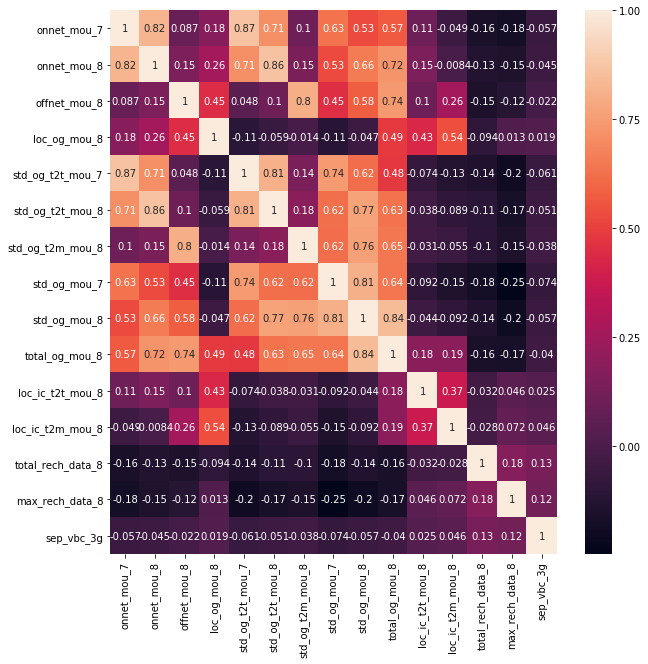

In [211]:
plt.figure(figsize=(10,10))
sns.heatmap(hvc_cust[cols].corr(), annot = True)

In [212]:
# Creating X_test dataframe with RFE selected variables
#X_train_rfe = pd.DataFrame(scaled_X_train, columns = X_train.columns)
##X_train_rfe = X_train_rfe[cols]

In [213]:
X_train_rfe = sm.add_constant(scaled_X_train[cols])


In [214]:
#X_train_rfe = sm.add_constant(X_train_rfe)

In [215]:
#Y_train.reindex(X_train_rfe.index)
Y = list(Y_train)

In [216]:
Y_train.index

Int64Index([11785, 11987, 11648, 12890,  3762, 10072, 15584,  5067, 16450,
            10103,
            ...
            10082, 14260, 16734, 16304,    79, 12119, 24423, 14147, 23320,
             5640],
           dtype='int64', length=21000)

In [217]:
#X_train_sm = sm.add_constant(X_train_rfe)
#logm = sm.GLM(Y_train,X_train_rfe, family = sm.families.Binomial())
logm = sm.GLM(Y,X_train_rfe, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3988.8
Date:                Mon, 16 Dec 2019   Deviance:                       7977.5
Time:                        22:45:57   Pearson chi2:                 2.62e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1750      0.084    -49.921      0.000      -4.339      -4.011
onnet_mou_7           0.7027      0.112      6.248      0.000       0.482       0.923
onnet_mou_8           0.3916      0.132      2.963      0.003       0.133       0.651
offnet_mou_8          1.0763      0.101     10.673      0.000       0.879       1.274
loc_og_mou_8         -0.1411      0.396     -0.356      0.722      -0.918       0.636
std_og_t2t_mou_7     -0.7469      0.110     -6.766      0.000      -0.963      -0.531
std_og_t2t_mou_8     -1.5642      0.248     -6.306      0.000      -2.050      -1.078
std_og_t2m_mou_8     -2.2346      0.236     -9.469      0.000      -2.697      -1.772
std_og_mou_7          0.4296      0.055      7.860      0.000       0.322       0.537
std_og_mou_8          3.9406      0.833      4.731      0.000       2.308       5.573
total_og_mou_8       -3.3476      0.778     -4.300      0.000      -4.873      -1.822
loc_ic_t2t_mou_8     -0.5633      0.112     -5.048      0.000      -0.782      -0.345
loc_ic_t2m_mou_8     -1.0605      0.118     -8.968      0.000      -1.292      -0.829
total_rech_data_8    -0.7542      0.064    -11.789      0.000      -0.880      -0.629
max_rech_data_8      -0.7051      0.050    -14.244      0.000      -0.802      -0.608
sep_vbc_3g           -1.0372      0.229     -4.523      0.000      -1.487      -0.588
=====================================================================================
"""

In [218]:
vif = pd.DataFrame()
X = X_train_rfe[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,std_og_mou_8,117.070000
9,total_og_mou_8,62.940000
5,std_og_t2t_mou_8,40.750000
6,std_og_t2m_mou_8,31.140000
3,loc_og_mou_8,17.980000
1,onnet_mou_8,17.560000
4,std_og_t2t_mou_7,15.320000
0,onnet_mou_7,12.960000
2,offnet_mou_8,10.530000
7,std_og_mou_7,6.200000


In [219]:
#Now let's try to remove loc_og_mou_8 as it has high p-value
X_train_new = X_train_rfe.drop(["loc_og_mou_8"], axis = 1)
logm = sm.GLM(Y,X_train_new, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3988.8
Date:                Mon, 16 Dec 2019   Deviance:                       7977.6
Time:                        22:45:58   Pearson chi2:                 2.59e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1769      0.083    -50.048      0.000      -4.341      -4.013
onnet_mou_7           0.7011      0.112      6.241      0.000       0.481       0.921
onnet_mou_8           0.3885      0.132      2.949      0.003       0.130       0.647
offnet_mou_8          1.0761      0.101     10.672      0.000       0.878       1.274
std_og_t2t_mou_7     -0.7453      0.110     -6.759      0.000      -0.961      -0.529
std_og_t2t_mou_8     -1.5841      0.242     -6.551      0.000      -2.058      -1.110
std_og_t2m_mou_8     -2.2577      0.227     -9.948      0.000      -2.703      -1.813
std_og_mou_7          0.4298      0.055      7.863      0.000       0.323       0.537
std_og_mou_8          4.2015      0.394     10.653      0.000       3.428       4.975
total_og_mou_8       -3.6118      0.244    -14.791      0.000      -4.090      -3.133
loc_ic_t2t_mou_8     -0.5650      0.112     -5.066      0.000      -0.784      -0.346
loc_ic_t2m_mou_8     -1.0653      0.118     -9.063      0.000      -1.296      -0.835
total_rech_data_8    -0.7537      0.064    -11.784      0.000      -0.879      -0.628
max_rech_data_8      -0.7053      0.050    -14.248      0.000      -0.802      -0.608
sep_vbc_3g           -1.0375      0.229     -4.523      0.000      -1.487      -0.588
=====================================================================================
"""

In [220]:
X_train_new = X_train_new.drop(["const"], axis =1)

In [221]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,std_og_mou_8,77.570000
4,std_og_t2t_mou_8,40.520000
5,std_og_t2m_mou_8,31.140000
8,total_og_mou_8,22.130000
1,onnet_mou_8,17.560000
3,std_og_t2t_mou_7,15.300000
0,onnet_mou_7,12.940000
2,offnet_mou_8,9.940000
6,std_og_mou_7,6.190000
10,loc_ic_t2m_mou_8,1.620000


In [222]:
#Now let's try to remove std_og_mou_8 as it has high p-value
X_train_new = X_train_new.drop(["std_og_mou_8"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
logm = sm.GLM(Y,X_train_lm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4023.6
Date:                Mon, 16 Dec 2019   Deviance:                       8047.2
Time:                        22:45:59   Pearson chi2:                 2.73e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1550      0.083    -50.219      0.000      -4.317      -3.993
onnet_mou_7           0.6383      0.109      5.847      0.000       0.424       0.852
onnet_mou_8           0.4009      0.129      3.110      0.002       0.148       0.654
offnet_mou_8          1.0151      0.097     10.440      0.000       0.825       1.206
std_og_t2t_mou_7     -0.7098      0.108     -6.591      0.000      -0.921      -0.499
std_og_t2t_mou_8      0.7460      0.166      4.507      0.000       0.422       1.070
std_og_t2m_mou_8      0.0574      0.128      0.449      0.653      -0.193       0.308
std_og_mou_7          0.4555      0.055      8.303      0.000       0.348       0.563
total_og_mou_8       -2.9854      0.215    -13.881      0.000      -3.407      -2.564
loc_ic_t2t_mou_8     -0.6386      0.115     -5.576      0.000      -0.863      -0.414
loc_ic_t2m_mou_8     -1.2119      0.119    -10.173      0.000      -1.445      -0.978
total_rech_data_8    -0.7514      0.064    -11.731      0.000      -0.877      -0.626
max_rech_data_8      -0.6917      0.049    -13.989      0.000      -0.789      -0.595
sep_vbc_3g           -1.0241      0.228     -4.497      0.000      -1.470      -0.578
=====================================================================================
"""

In [223]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_og_mou_8,17.660000
1,onnet_mou_8,16.740000
3,std_og_t2t_mou_7,15.300000
0,onnet_mou_7,12.870000
4,std_og_t2t_mou_8,12.770000
2,offnet_mou_8,8.890000
6,std_og_mou_7,5.990000
5,std_og_t2m_mou_8,5.660000
9,loc_ic_t2m_mou_8,1.600000
8,loc_ic_t2t_mou_8,1.340000


In [224]:
#Now let's try to remove sachet_2g_8 as it has high VIF
X_train_new = X_train_new.drop(["std_og_t2m_mou_8"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
logm = sm.GLM(Y,X_train_lm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4023.7
Date:                Mon, 16 Dec 2019   Deviance:                       8047.4
Time:                        22:46:01   Pearson chi2:                 2.60e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1514      0.082    -50.433      0.000      -4.313      -3.990
onnet_mou_7           0.6300      0.107      5.869      0.000       0.420       0.840
onnet_mou_8           0.3896      0.126      3.093      0.002       0.143       0.636
offnet_mou_8          1.0276      0.093     11.025      0.000       0.845       1.210
std_og_t2t_mou_7     -0.7066      0.107     -6.589      0.000      -0.917      -0.496
std_og_t2t_mou_8      0.7223      0.156      4.628      0.000       0.416       1.028
std_og_mou_7          0.4631      0.052      8.852      0.000       0.361       0.566
total_og_mou_8       -2.9200      0.157    -18.572      0.000      -3.228      -2.612
loc_ic_t2t_mou_8     -0.6439      0.114     -5.644      0.000      -0.868      -0.420
loc_ic_t2m_mou_8     -1.2320      0.111    -11.130      0.000      -1.449      -1.015
total_rech_data_8    -0.7505      0.064    -11.724      0.000      -0.876      -0.625
max_rech_data_8      -0.6912      0.049    -13.984      0.000      -0.788      -0.594
sep_vbc_3g           -1.0253      0.228     -4.499      0.000      -1.472      -0.579
=====================================================================================
"""

In [225]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,16.610000
1,onnet_mou_8,16.100000
3,std_og_t2t_mou_7,14.750000
0,onnet_mou_7,12.860000
4,std_og_t2t_mou_8,12.700000
2,offnet_mou_8,8.200000
5,std_og_mou_7,4.340000
8,loc_ic_t2m_mou_8,1.410000
7,loc_ic_t2t_mou_8,1.340000
10,max_rech_data_8,1.100000


In [226]:
#Now let's try to remove total_og_mou_8 as it has high VIF
X_train_new = X_train_new.drop(["total_og_mou_8"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
logm = sm.GLM(Y,X_train_lm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4303.0
Date:                Mon, 16 Dec 2019   Deviance:                       8605.9
Time:                        22:46:02   Pearson chi2:                 1.35e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2752      0.086    -49.544      0.000      -4.444      -4.106
onnet_mou_7           0.1018      0.093      1.098      0.272      -0.080       0.284
onnet_mou_8           0.2015      0.091      2.223      0.026       0.024       0.379
offnet_mou_8         -0.3108      0.044     -7.095      0.000      -0.397      -0.225
std_og_t2t_mou_7     -0.0014      0.090     -0.016      0.988      -0.179       0.176
std_og_t2t_mou_8     -0.8608      0.091     -9.504      0.000      -1.038      -0.683
std_og_mou_7          0.1741      0.047      3.674      0.000       0.081       0.267
loc_ic_t2t_mou_8     -1.1531      0.125     -9.207      0.000      -1.399      -0.908
loc_ic_t2m_mou_8     -1.9250      0.118    -16.339      0.000      -2.156      -1.694
total_rech_data_8    -0.8383      0.066    -12.769      0.000      -0.967      -0.710
max_rech_data_8      -0.6576      0.050    -13.097      0.000      -0.756      -0.559
sep_vbc_3g           -0.9946      0.219     -4.545      0.000      -1.424      -0.566
=====================================================================================
"""

In [227]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_t2t_mou_7,14.260000
1,onnet_mou_8,12.720000
0,onnet_mou_7,12.680000
4,std_og_t2t_mou_8,11.990000
5,std_og_mou_7,4.250000
2,offnet_mou_8,2.080000
7,loc_ic_t2m_mou_8,1.380000
6,loc_ic_t2t_mou_8,1.330000
9,max_rech_data_8,1.100000
8,total_rech_data_8,1.080000


In [228]:
#Now let's try to remove onnet_mou_8 as it has high VIF
X_train_new = X_train_new.drop(["std_og_t2t_mou_7"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
logm = sm.GLM(Y,X_train_lm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4303.0
Date:                Mon, 16 Dec 2019   Deviance:                       8605.9
Time:                        22:46:03   Pearson chi2:                 1.35e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2751      0.086    -49.623      0.000      -4.444      -4.106
onnet_mou_7           0.1006      0.051      1.983      0.047       0.001       0.200
onnet_mou_8           0.2024      0.071      2.835      0.005       0.062       0.342
offnet_mou_8         -0.3106      0.043     -7.225      0.000      -0.395      -0.226
std_og_t2t_mou_8     -0.8618      0.067    -12.783      0.000      -0.994      -0.730
std_og_mou_7          0.1738      0.045      3.897      0.000       0.086       0.261
loc_ic_t2t_mou_8     -1.1529      0.125     -9.246      0.000      -1.397      -0.909
loc_ic_t2m_mou_8     -1.9250      0.118    -16.340      0.000      -2.156      -1.694
total_rech_data_8    -0.8383      0.066    -12.769      0.000      -0.967      -0.710
max_rech_data_8      -0.6576      0.050    -13.097      0.000      -0.756      -0.559
sep_vbc_3g           -0.9946      0.219     -4.545      0.000      -1.424      -0.566
=====================================================================================
"""

In [229]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_8,8.220000
3,std_og_t2t_mou_8,5.920000
0,onnet_mou_7,4.670000
4,std_og_mou_7,3.670000
2,offnet_mou_8,1.950000
6,loc_ic_t2m_mou_8,1.370000
5,loc_ic_t2t_mou_8,1.320000
8,max_rech_data_8,1.100000
7,total_rech_data_8,1.080000
9,sep_vbc_3g,1.030000


In [230]:
#Now let's try to remove std_og_t2t_mou_7 as it has high VIF
X_train_new = X_train_new.drop(["onnet_mou_8"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
logm = sm.GLM(Y,X_train_lm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4306.9
Date:                Mon, 16 Dec 2019   Deviance:                       8613.8
Time:                        22:46:06   Pearson chi2:                 1.44e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2729      0.086    -49.636      0.000      -4.442      -4.104
onnet_mou_7           0.1936      0.039      4.998      0.000       0.118       0.270
offnet_mou_8         -0.2702      0.040     -6.732      0.000      -0.349      -0.191
std_og_t2t_mou_8     -0.7397      0.053    -14.021      0.000      -0.843      -0.636
std_og_mou_7          0.1196      0.040      2.955      0.003       0.040       0.199
loc_ic_t2t_mou_8     -1.1044      0.123     -8.999      0.000      -1.345      -0.864
loc_ic_t2m_mou_8     -1.9537      0.118    -16.616      0.000      -2.184      -1.723
total_rech_data_8    -0.8384      0.066    -12.777      0.000      -0.967      -0.710
max_rech_data_8      -0.6578      0.050    -13.106      0.000      -0.756      -0.559
sep_vbc_3g           -0.9895      0.218     -4.541      0.000      -1.417      -0.562
=====================================================================================
"""

In [231]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_mou_7,3.030000
0,onnet_mou_7,2.600000
2,std_og_t2t_mou_8,2.300000
1,offnet_mou_8,1.710000
5,loc_ic_t2m_mou_8,1.350000
4,loc_ic_t2t_mou_8,1.240000
7,max_rech_data_8,1.100000
6,total_rech_data_8,1.080000
8,sep_vbc_3g,1.030000


### Telecom company needs to pay attention STD outgoing offers and local incoming offers as that seems to be a significant aspect in churned customers.
### They should also provide good recharge offers within same operator as well as to other operators  for std outgoing and  local incoming.
